### Import các thư viện cần thiết

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Đọc file .csv
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [73]:
# Xem 5 bất kỳ của bộ dữ liệu
df.sample(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
69,70,Female,33,Scientist,6.2,6,50,6,Overweight,128/85,76,5500,NaN
77,78,Male,33,Doctor,6.0,6,30,8,Normal,125/80,72,5000,NaN
363,364,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
91,92,Male,35,Engineer,7.3,8,60,4,Normal,125/80,65,5000,NaN
340,341,Female,55,Nurse,8.1,9,75,4,Overweight,140/95,72,5000,Sleep Apnea


In [74]:
# Tóm tắt bộ dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [75]:
# Mô tả bộ dữ liệu
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# 1. Data Cleaning

##  1.1.Xử lý giá trị bị khuyết


Theo mô tả của bộ dữ liệu, cột Sleep Disorder có các giá trị "None", "Insomnia" và "Sleep Apnea"
Tuy nhiên, khi đọc file CSV thì Pandas đã tự động chuyển các giá trị "None" thành NaN. Vì vậy cần thay thế
các giá trị NaN này lại bằng giá trị "None" với ý nghĩa là "Không có rối loạn giấc ngủ" 

In [76]:
# Thay thế các giá trị NaN trong cột Sleep Disorder bằng "None"
df.fillna({"Sleep Disorder": "None"}, inplace=True)

# Kiểm tra lại các giá trị khác biệt
unique_values = df['Sleep Disorder'].unique()
print(unique_values)


['None' 'Sleep Apnea' 'Insomnia']


In [77]:
# Xem lại giá trị sau khi chuyển đổi
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [78]:
# Thống kê số lượng giá trị bị khuyết từng biến
missing_values = [".", "?", "_", "-", "", "NULL", "Not", "|", "Missing value"]
missing_values_count = df.isin(missing_values).sum()
print(missing_values_count)

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [79]:
# Kiểm tra các giá trị NaN
missing_data = df.isnull().sum()
print(missing_data)

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [80]:
# Tách cột Blood Pressure thành 2 cột Systolic, Diastolic (Tâm trương, Tâm thu)
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

In [81]:
# Chuyển kiểu dữ liệu các cột mới tạo thành kiểu số nguyên để dễ phân tích
df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')

In [82]:
# Kiểm tra kiểu dữ liệu của các cột
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
Systolic                     int64
Diastolic                    int64
dtype: object

## 1.2. Xóa cột Person ID


- Vì cột Person ID chỉ dùng để đánh số thứ tự bản ghi và không có giá trị trong việc phân tích. Do vậy ta sẽ xóa cột này khỏi df.

In [83]:
df.drop(columns=['Person ID'], inplace=True)

## 1.3. Thay đổi giá trị Normal Weight thành Normal 

In [84]:
df.replace({'BMI Category': {'Normal Weight': 'Normal'}}, inplace=True)

# 2. EDA

+ Thống kê mô tả cơ bản (mean, median, ..).
+ Phân tích phân bố của các biến (với histograms, boxplots).
+ Tìm hiểu mối quan hệ giữa các biến (correlation matrix, scatter plots).

### 2.1. Biến mục tiêu

In [85]:
target_col = 'Sleep Duration'

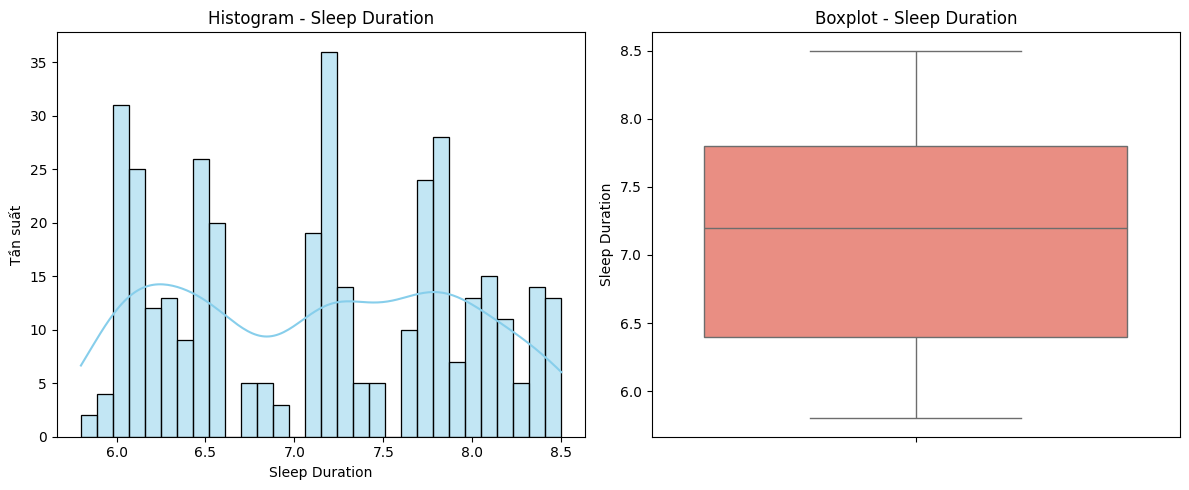

In [86]:
def get_iqr_range_for_column(df, column_name):
    """
    Xuất khoảng IQR (Interquartile Range) của một cột trong DataFrame.

    Parameters:
    - df: DataFrame, DataFrame chứa dữ liệu.
    - column_name: str, Tên của cột cần xuất khoảng IQR.

    Returns:
    - tuple, Bao gồm giá trị Q1 và Q3.
    """

    data = df[column_name]


    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    return Q1, Q3


def plot_histogram_and_boxplot(data, variable):
    """
    Vẽ hai biểu đồ histogram và boxplot bên cạnh nhau cho biến số.

    Parameters:
    - data: DataFrame, dữ liệu chứa biến số.
    - variable: str, tên biến số trong DataFrame.

    Returns:
    None (Hiển thị biểu đồ).
    """

    plt.figure(figsize=(12, 5))

    # Biểu đồ Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30, kde=True,
                 color='skyblue', edgecolor='black')
    plt.title(f'Histogram - {variable}')
    plt.xlabel(variable)
    plt.ylabel('Tần suất')

    # Biểu đồ Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable], color='salmon')
    plt.title(f'Boxplot - {variable}')
    plt.ylabel(variable)

    plt.tight_layout()
    plt.show()

Q2 = df[target_col].quantile(0.5)
IQR = get_iqr_range_for_column(df, target_col)
#print(f"Stress Level có tần suất xuất hiện cao nhất là: {Q2}")
#print(f"Khoảng Stress Level có tần suất xuất hiện cao nhất là {IQR}")


plot_histogram_and_boxplot(df, target_col)

### 2.2 Mean, Median, Mode

In [87]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  Systolic                 374 non-null    int64  
 13  Diastolic                374 non-null    int64  
dtypes: float64(1), int64(8), o

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [88]:
numeric_cols = [column for column in df.columns if df[column].dtype != object 
               and column != 'Sleep Duration']

# Tính và in giá trị trung vị cho các biến số
for col in numeric_cols:
    median_value = df[col].median()
    print(f"{col}_median: {median_value}")

Age_median: 43.0
Quality of Sleep_median: 7.0
Physical Activity Level_median: 60.0
Stress Level_median: 5.0
Heart Rate_median: 70.0
Daily Steps_median: 7000.0
Systolic_median: 130.0
Diastolic_median: 85.0


In [89]:
# Tính và in giá trị mode cho các biến số
for col in numeric_cols:
    mode_value = df[col].mode()
    print(f"{col}_median: {mode_value}")

Age_median: 0    43
Name: Age, dtype: int64
Quality of Sleep_median: 0    8
Name: Quality of Sleep, dtype: int64
Physical Activity Level_median: 0    60
Name: Physical Activity Level, dtype: int64
Stress Level_median: 0    3
Name: Stress Level, dtype: int64
Heart Rate_median: 0    68
Name: Heart Rate, dtype: int64
Daily Steps_median: 0    8000
Name: Daily Steps, dtype: int64
Systolic_median: 0    130
Name: Systolic, dtype: int64
Diastolic_median: 0    80
Name: Diastolic, dtype: int64


In [90]:
# Các biến định lượng bao gồm 'Sleep Duration'
quantitative_columns = [
    'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
    'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic'
]

## 2.3. Trực quan phân bố các biến

### 2.3.1. Phân bố biến định lượng


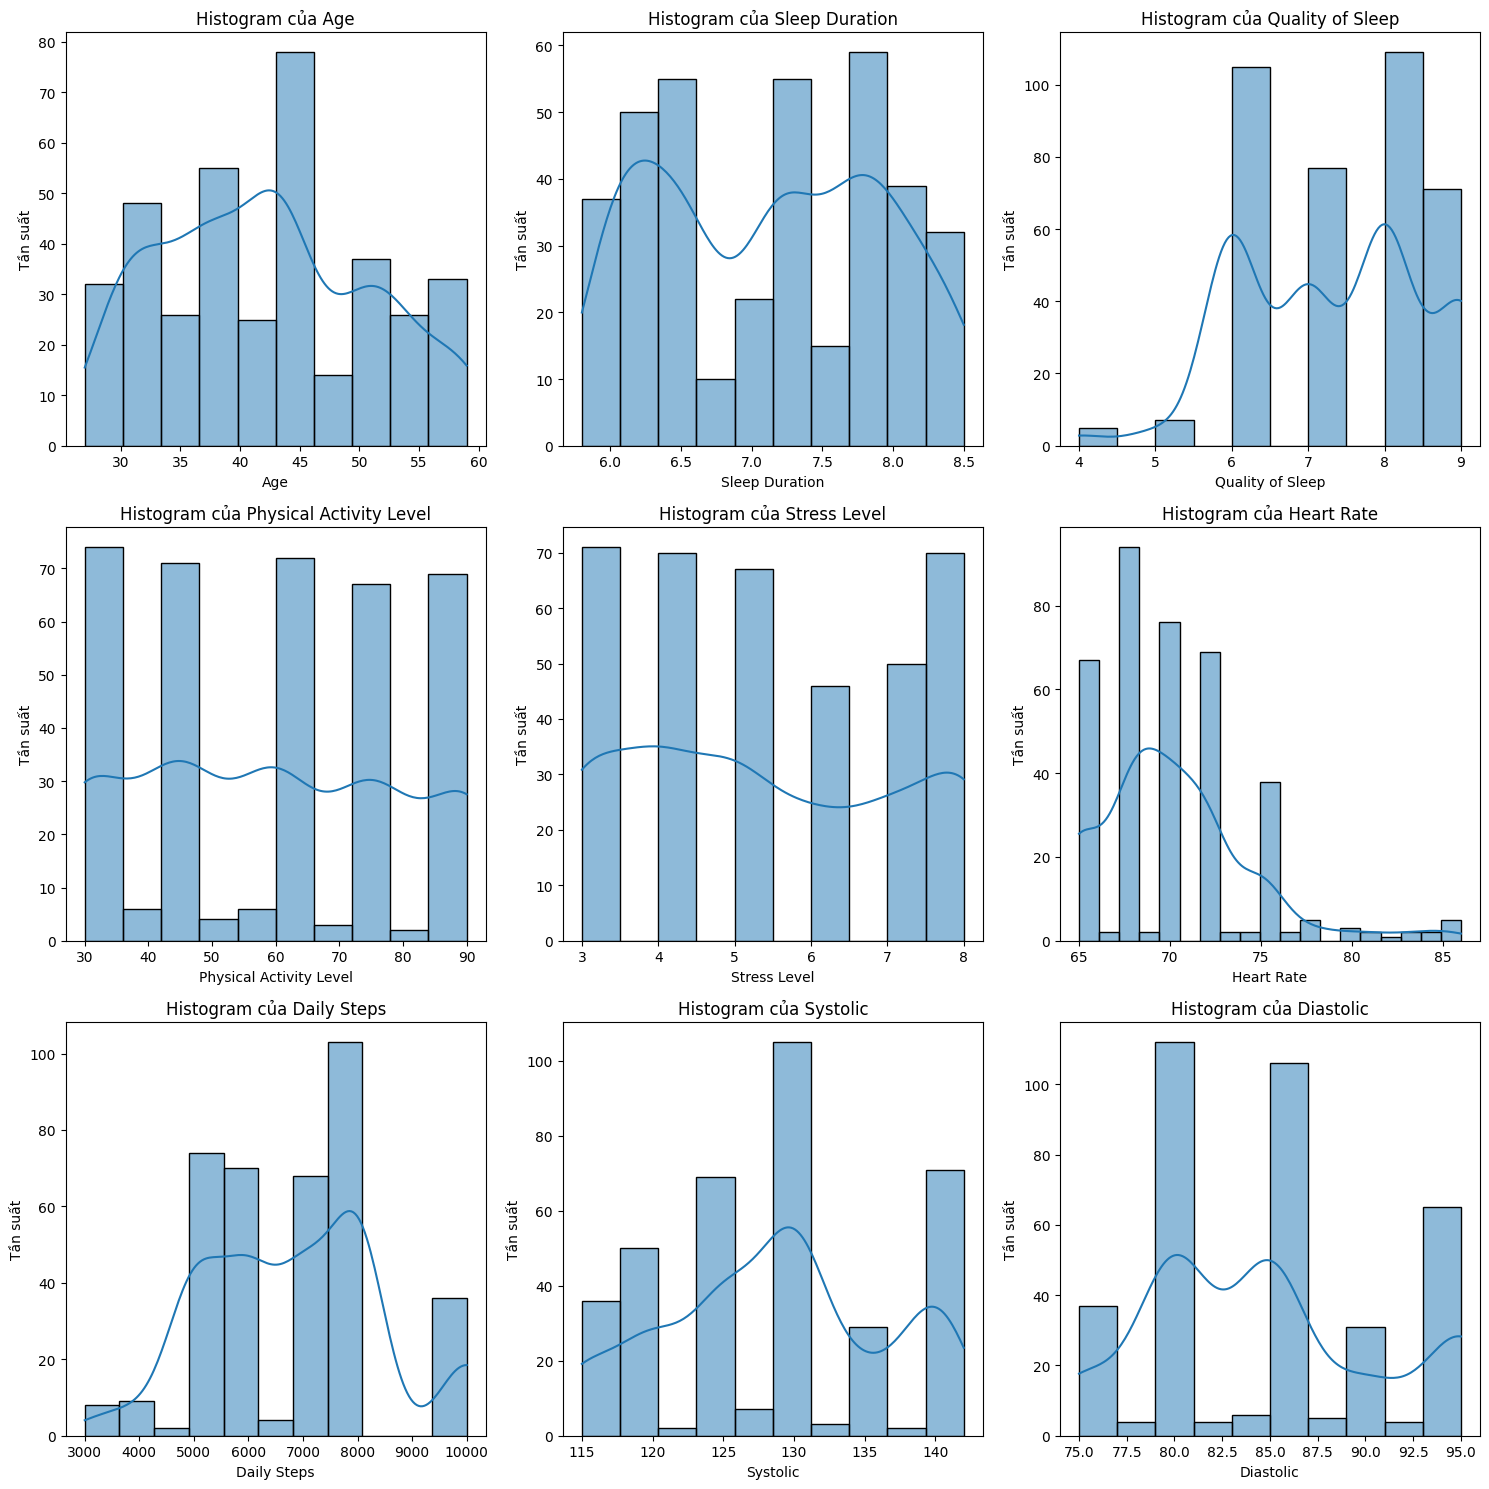

In [91]:
def histogram_selected_variables(data, variables):
    """
    Vẽ histogram cho danh sách các biến định lượng.

    Parameters:
    - data: DataFrame, chứa các biến số.
    - variables: list, Danh sách tên các biến định lượng cần vẽ histogram.

    Returns:
    - None (Hiển thị biểu đồ).
    """
    
    num_vars = len(variables)
    rows = (num_vars + 2) // 3 
    cols = min(3, num_vars)   

 
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()  


    for i, var in enumerate(variables):
        sns.histplot(data[var], kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram của {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Tần suất')

   
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Chỉnh layout và hiển thị
    plt.tight_layout()
    plt.show()

# Gọi hàm với DataFrame và danh sách các biến định lượng
#histogram_selected_variables(df, numeric_cols)
histogram_selected_variables(df, quantitative_columns)


Vẽ biểu đồ Histogram cho biến định lượng và rút ra được 1 số nhận xét sau:
- **Age**: Tuổi tập trung nhiều ở khoảng 40-50 tuổi.
- **Sleep Duration**: Thời gian ngủ được phân bổ đều từ 6-8.5 giờ, phổ biến nhất trong khoảng từ 7-8 giờ
- **Quality of Sleep**: Chất lượng giấc ngủ chủ yếu nằm từ mức 6-9, phổ biến nhất trong khoảng 7-8
- **Physical Activity Level**: Mức độ hoạt động thể chất phân bố chủ yếu từ 30-90
- **Stress Level**: Mức độ căng thẳng nằm trong khoảng 3-8, phân bố chủ yếu từ 3-5
- **Heart Rate**: Nhịp tim tập trung nhiều ở khoảng 65-70 nhịp/phút, đây là khoảng bình thường cho người trưởng thành.
- **Daily Steps**: Số bước đi hàng ngày tập trung nhiều ở 2 khoảng 5000-6000 và 7000-8000 => 1 nhóm ít vận động và 1 nhóm vận động nhiều
- **Systolic**: Huyết áp tâm thu tập trung ở khoảng 120-130 mmHg, đây là mức bình thường. Có một số trường hợp cao hơn (135-140 mmHg), có thể liên quan đến nguy cơ tăng huyết áp.
- **Diastolic**: Huyết áp tâm trương phổ biến nhất nằm ở khoảng 80-85 mmHg, mức bình thường

### 2.3.2. Phân bố biến phân loại

In [92]:
# Danh sách các biến phân loại
categorical_cols = [column for column in df.columns if column not in 
                    numeric_cols and column not in ('Blood Pressure', 'Sleep Duration')]

print(categorical_cols)

['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']


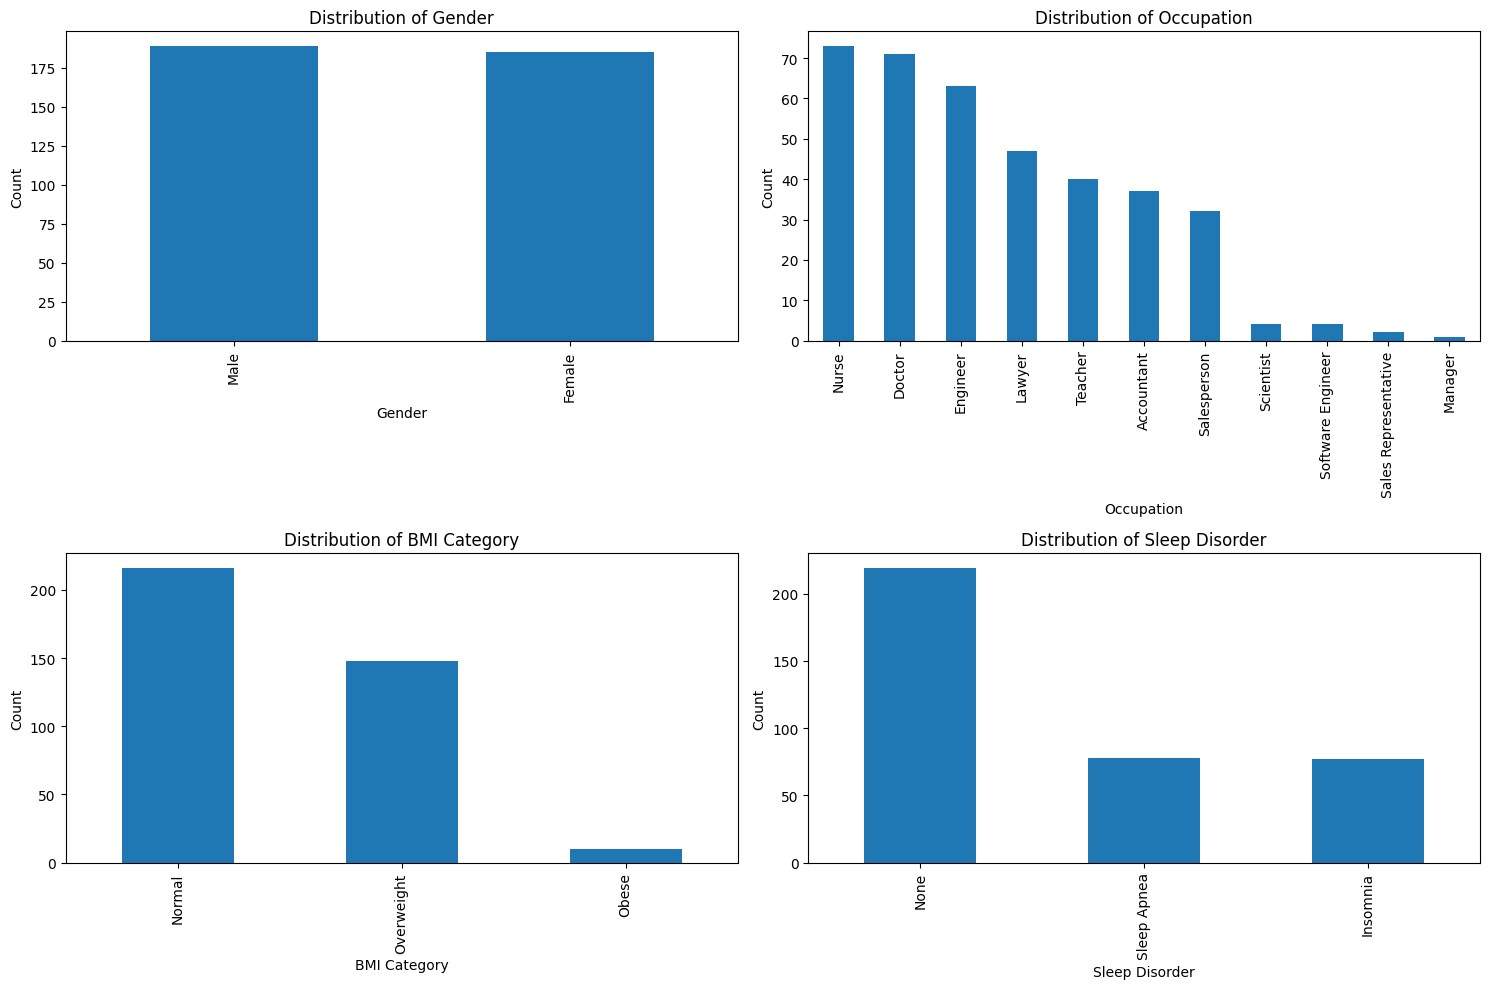

In [93]:
# Tạo lưới để vẽ các biểu đồ trong cùng một khung hình
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Duyệt qua từng biến phân loại và tạo biểu đồ cột
for i, col in enumerate(categorical_cols):
    ax = axes[i // 2, i % 2]  # Xác định vị trí trong lưới
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


### 2.3.3. Boxplot

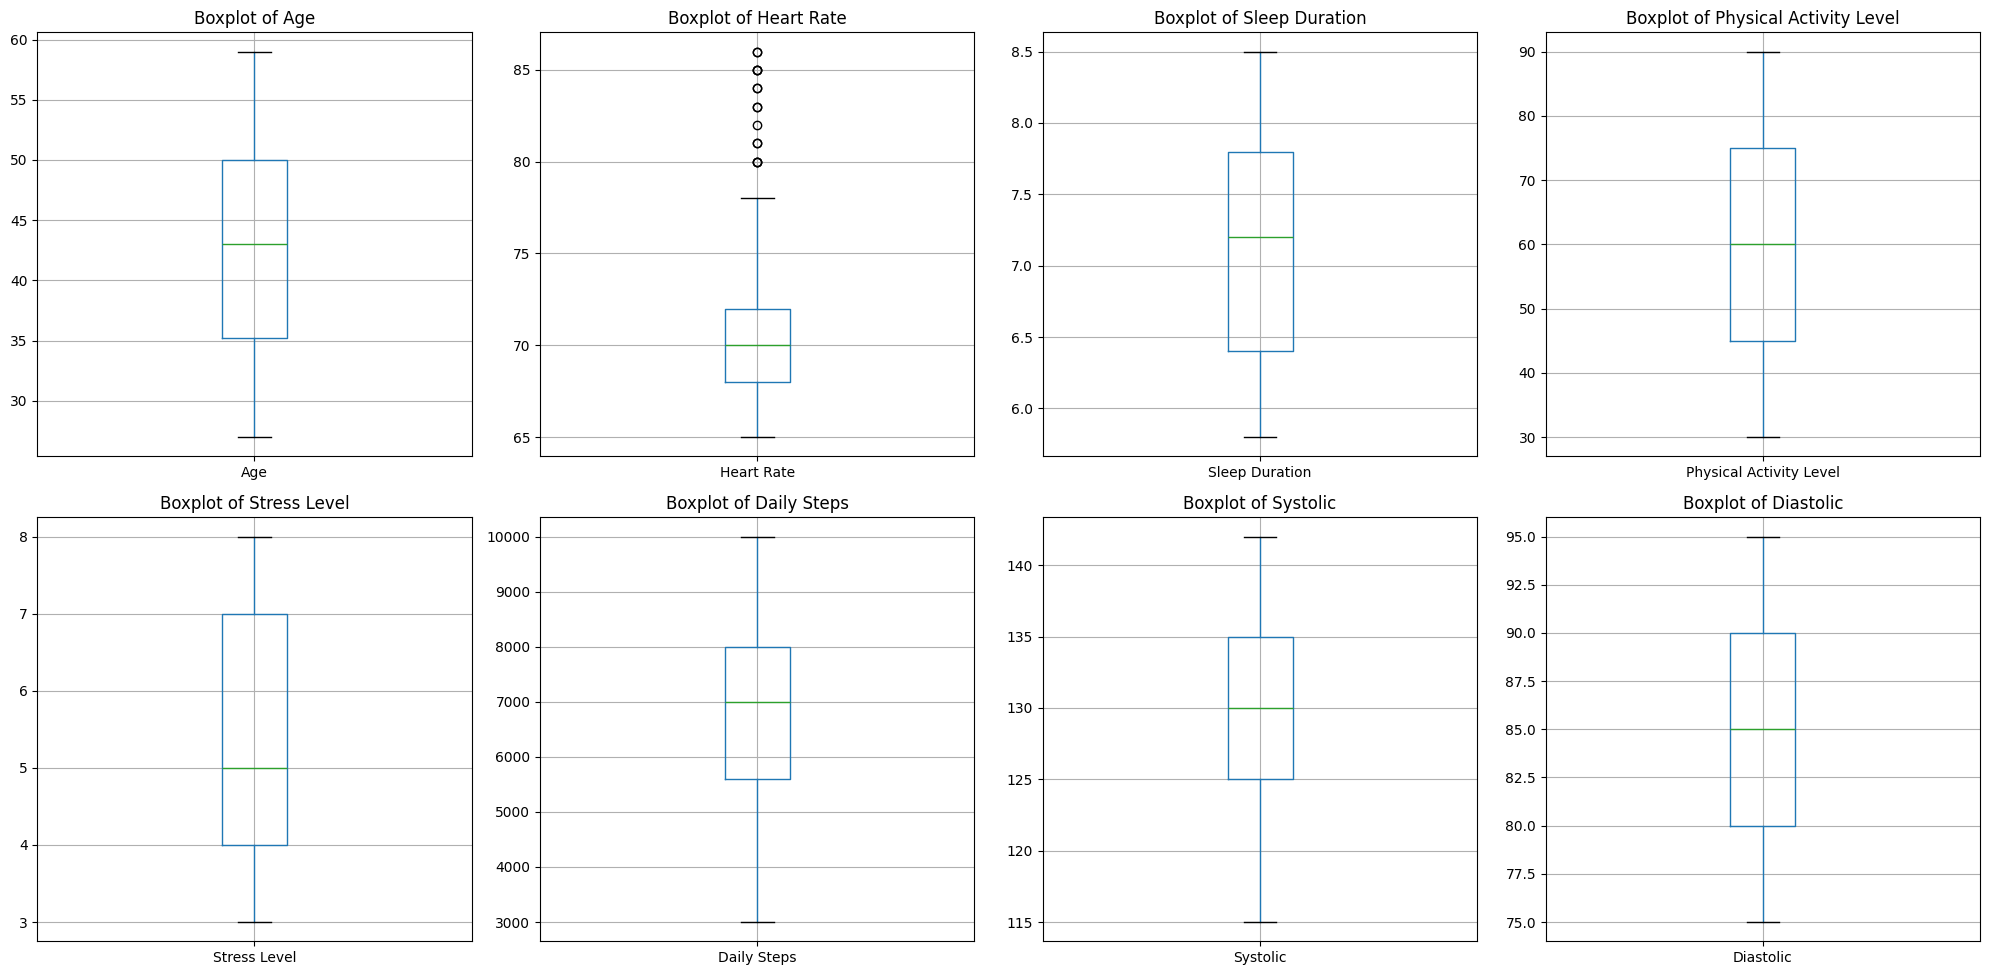

In [94]:
# Tạo lưới 1x3 để chứa 3 biểu đồ boxplot
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Vẽ boxplot cho cột 'Age' trong ô đầu tiên
df.boxplot(column='Age', ax=axes[0, 0])
axes[0, 0].set_title("Boxplot of Age")

# Vẽ boxplot cho cột 'Heart Rate' trong ô thứ hai
df.boxplot(column='Heart Rate', ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of Heart Rate")

# Vẽ boxplot cho cột 'Sleep Duration' trong ô thứ ba
df.boxplot(column='Sleep Duration', ax=axes[0, 2])
axes[0, 2].set_title("Boxplot of Sleep Duration")

# Vẽ boxplot cho cột 'Physical Activity Level'
df.boxplot(column='Physical Activity Level', ax=axes[0, 3])
axes[0, 3].set_title("Boxplot of Physical Activity Level")

# Vẽ boxplot cho cột 'Stress Level'
df.boxplot(column='Stress Level', ax=axes[1, 0])
axes[1,0].set_title("Boxplot of Stress Level")

# Vẽ boxplot cho cột 'Daily Steps'
df.boxplot(column='Daily Steps', ax=axes[1, 1])
axes[1,1].set_title("Boxplot of Daily Steps")

# Vẽ boxplot cho cột 'Systolic'
df.boxplot(column='Systolic', ax=axes[1, 2])
axes[1,2].set_title("Boxplot of Systolic")

# Vẽ boxplot cho cột 'Diastolic'
df.boxplot(column='Diastolic', ax=axes[1, 3])
axes[1,3].set_title("Boxplot of Diastolic")

# Hiển thị toàn bộ biểu đồ
plt.suptitle("")  # Để trống tiêu đề tổng thể 
plt.tight_layout()
plt.show()


## 2.4. Mối quan hệ giữa các biến

### 2.4.1. Biến số với Sleep Duration 


#### 2.4.1.1. Biểu đồ tương quan (Correlation matrix) các biến số

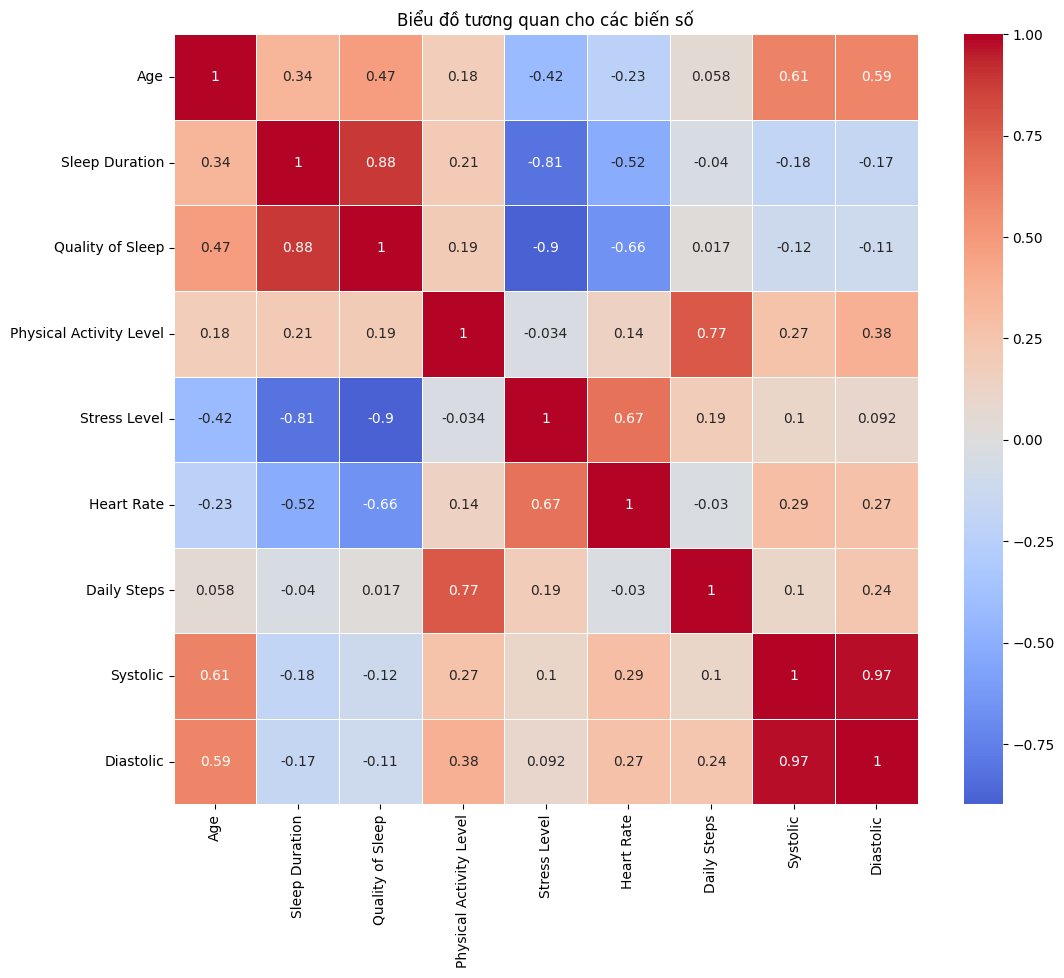

In [95]:
def correlation_plot(df, numeric_columns):
    """
    Tạo correlation plot cho các biến số trong DataFrame.

    Parameters:
    - df: DataFrame, DataFrame chứa dữ liệu.
    - numeric_columns: list, Danh sách các tên cột kiểu số.

    Returns:
    - None
    """
    numeric_df = df.loc[:, numeric_columns].copy()

    # Tính ma trận tương quan.
    correlation_matrix = numeric_df.corr()

    # Tạo correlation plot bằng seaborn.
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5)
    plt.title('Biểu đồ tương quan cho các biến số')
    plt.show()

correlation_plot(df, quantitative_columns)

Vẽ biểu đồ tương quan giữa các biến ta có thể thấy: 
- **Sleep Duration và Age (hệ số tương quan: 0.34)**: mối tương quan thuận yếu, chỉ ra rằng chất lượng giấc ngủ càng cao thì thời gian ngủ tăng
- **Sleep Duration và Stress Level (hệ số tương quan: -0.81)**: mối tương quan nghịch mạnh, chỉ ra rằng khi mức độ căng thẳng (Stress Level) tăng, thời gian ngủ (Sleep Duration) có xu hướng giảm
- **Sleep Duration và Quality of Sleep (hệ số tương quan: 0.88)**: mối tương quan thuận rất mạnh, chỉ ra rằng chất lượng giấc ngủ càng cao thì thời gian ngủ tăng
- **Sleep Duration và Heart Rate (hệ số tương quan: -0.52)**: mối tương quan nghịch vừa, chỉ ra rằng nhịp tim tăng thì thời gian ngủ có xu hướng giảm.

#### 2.4.1.2. Phân tích tương quan giữa các biến số và Sleep Duration

In [96]:
from scipy.stats import pearsonr
import pandas as pd

def correlation_SleepDuration(df, numeric_columns):
    """
    Tính toán hệ số tương quan Pearson giữa các biến số số học và biến mục tiêu (Sleep Duration).

    Tham số:
    - df: pd.DataFrame, DataFrame chứa dữ liệu.
    - numeric_columns: list, Danh sách các cột số học trong DataFrame.

    Trả về:
    - pd.DataFrame: Kết quả dưới dạng bảng với các cột: Biến số, Hệ số tương quan Pearson, P-value.
    """
    # Lọc chỉ các cột số và tạo bản sao
    numeric_df = df.loc[:, numeric_columns].copy()

    # Danh sách để lưu kết quả
    results = []

    # Tính hệ số tương quan và P-value cho từng cột
    for col in numeric_df.columns:
        if col != 'Sleep Duration':  # Bỏ qua nếu là cột mục tiêu
            correlation, p_value = pearsonr(numeric_df[col], numeric_df['Sleep Duration'])
            
            # Kết luận về mức độ ảnh hưởng
            if abs(correlation) > 0.3 and p_value < 0.05:
                conclusion = "Có ảnh hưởng đáng kể đối với Sleep Duration."
            else:
                conclusion = "Không có ảnh hưởng đáng kể đối với Sleep Duration."
            
            results.append({
                'Biến số': col,
                'Hệ số tương quan Pearson': correlation,
                'P-value': p_value,
                'Kết luận': conclusion
            })

    
    correlation_results = pd.DataFrame(results)

    correlation_results = correlation_results.sort_values(by='Hệ số tương quan Pearson', key=abs, ascending=False)

    return correlation_results
table = correlation_SleepDuration(df, quantitative_columns)
table

,Biến số,Hệ số tương quan Pearson,P-value,Kết luận
1,Quality of Sleep,0.883213,2.170992e-124,Có ảnh hưởng đáng kể đối với Sleep Duration.
3,Stress Level,-0.811023,1.237808e-88,Có ảnh hưởng đáng kể đối với Sleep Duration.
4,Heart Rate,-0.516455,6.914740e-27,Có ảnh hưởng đáng kể đối với Sleep Duration.
0,Age,0.344709,7.117140e-12,Có ảnh hưởng đáng kể đối với Sleep Duration.
2,Physical Activity Level,0.212360,3.466618e-05,Không có ảnh hưởng đáng kể đối với Sleep Durat...
6,Systolic,-0.180406,4.548579e-04,Không có ảnh hưởng đáng kể đối với Sleep Durat...
7,Diastolic,-0.166570,1.224373e-03,Không có ảnh hưởng đáng kể đối với Sleep Durat...
5,Daily Steps,-0.039533,4.459038e-01,Không có ảnh hưởng đáng kể đối với Sleep Durat...


Ta có thể nhận xét các biến có ảnh hưởng đến Sleep Duration:
- Quality of Sleep
- Stress Level
- Heart Rate	
- Age

In [97]:
numeric_cols = ['Quality of Sleep', 'Stress Level', 'Heart Rate', 'Age']

In [98]:
# Tạo một bản sao của dataset để không thay đổi dataset gốc
eda_df = df.copy()

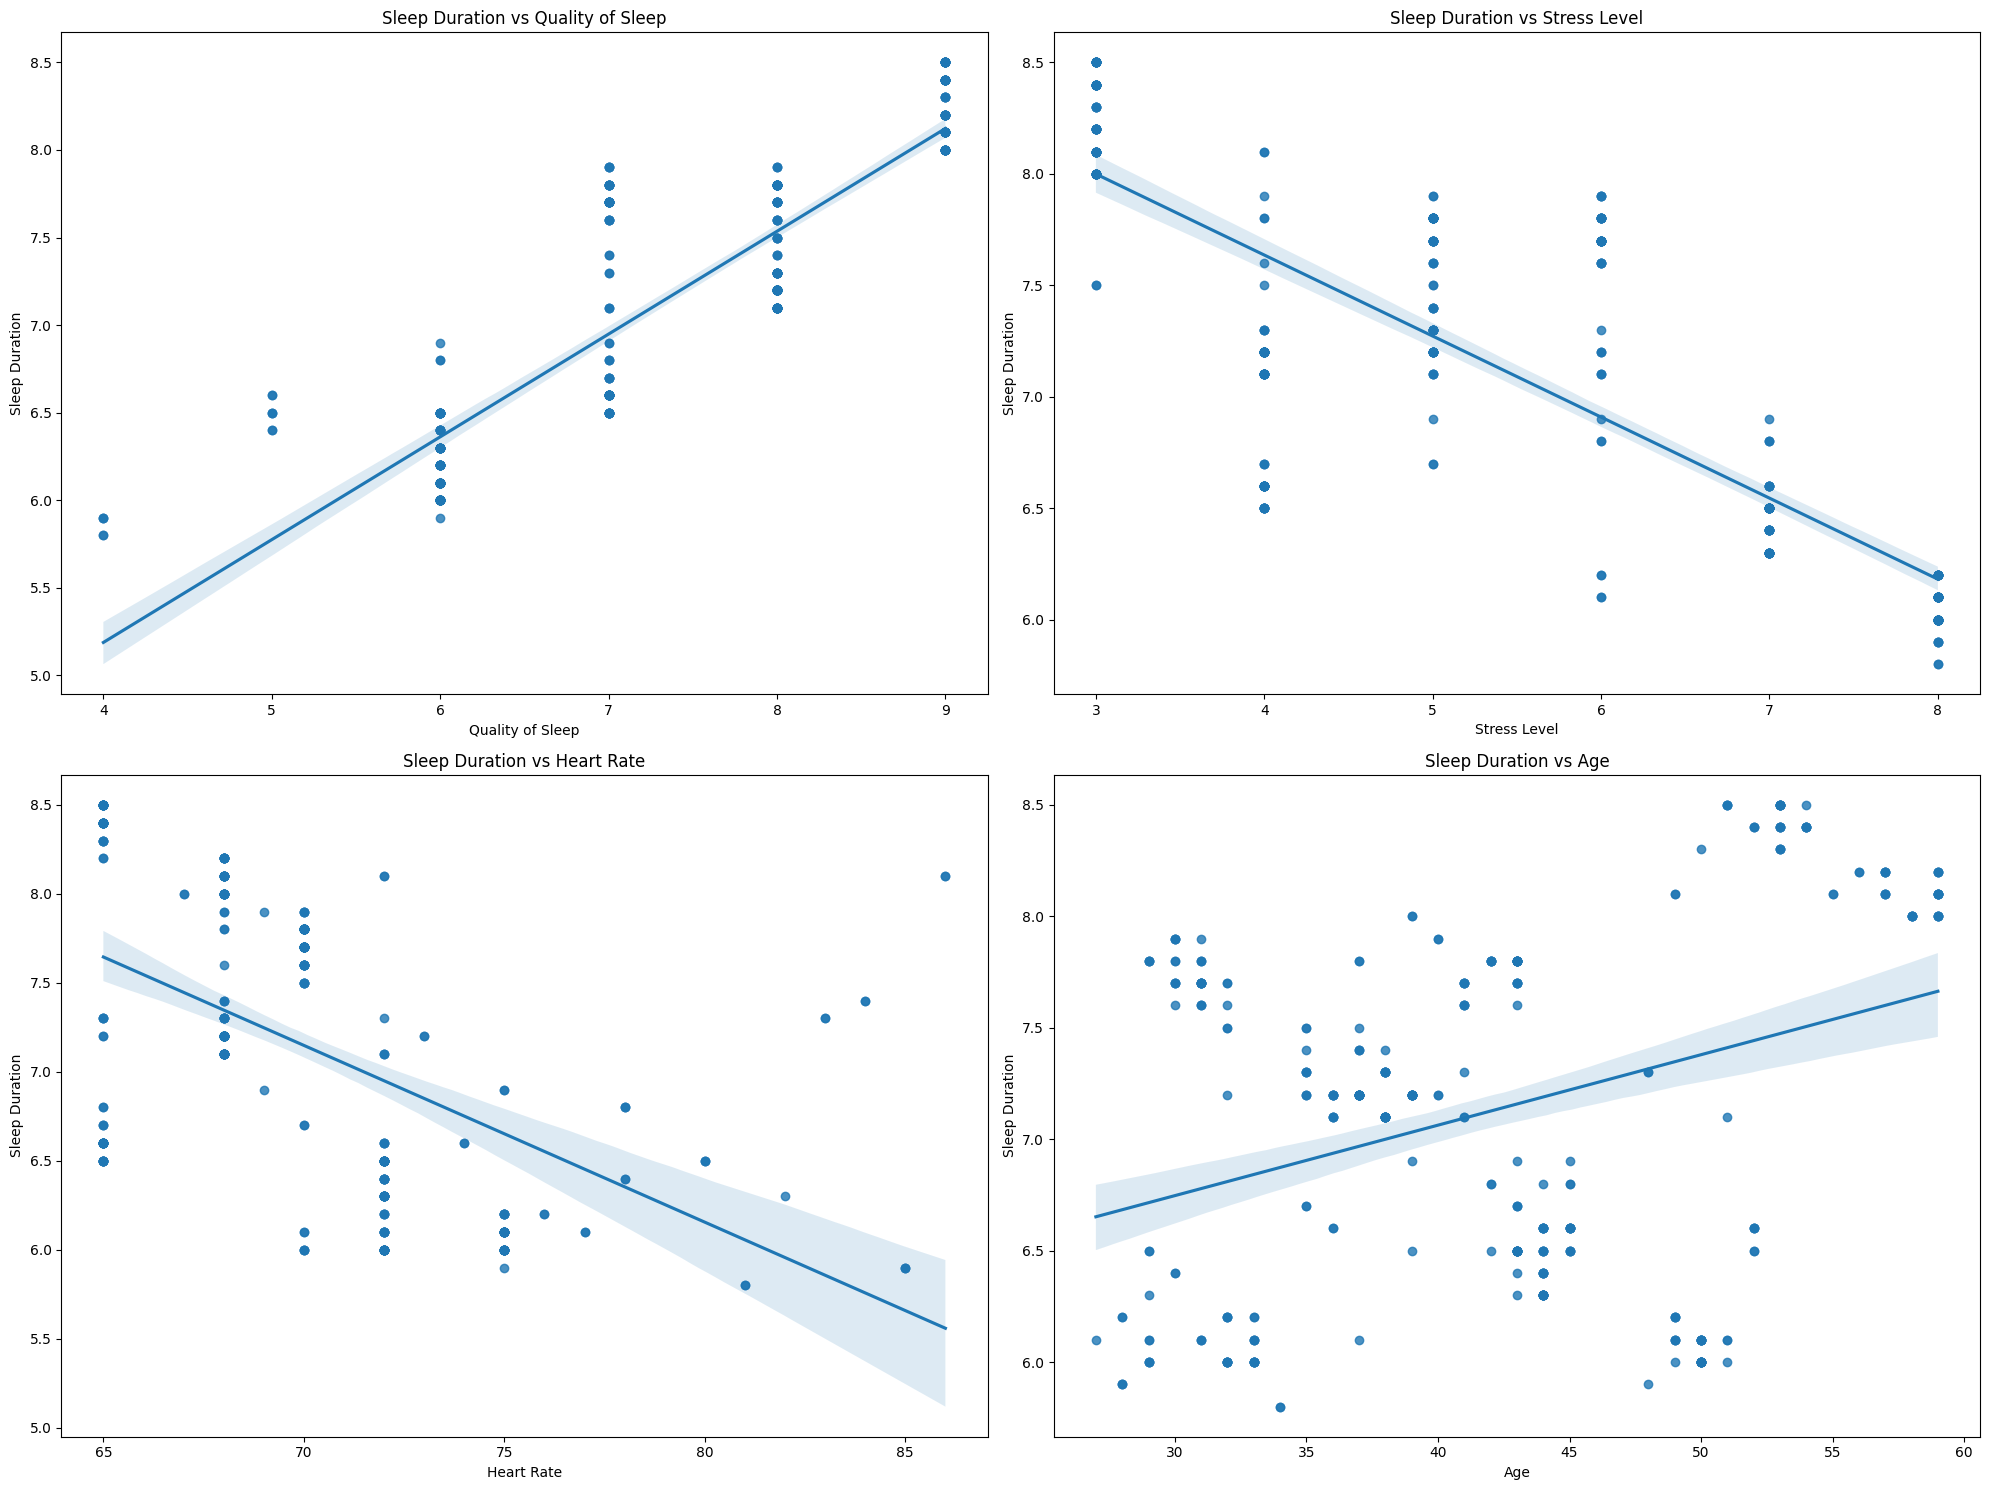

In [99]:
# Danh sách các biến số có thể ảnh hưởng đến biến Sleep Duration
affecting_variables = numeric_cols

# Tạo khung hình chứa biểu đồ
fig , axes = plt.subplots(2, 2, figsize=(20, 15))

# Vẽ từng biểu đồ tương quan
for i, col in enumerate(affecting_variables):
    ax = axes[i // 2, i % 2]
    sns.regplot(x=col, y='Sleep Duration', data=eda_df, ax=ax)
    ax.set_title(f'Sleep Duration vs {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Sleep Duration')

plt.tight_layout()
plt.show()


### 2.4.2. Biến phân loại với Sleep Duration


#### 2.4.2.1 Phân tích tương quan giữa các biến định lượng và Sleep Duration

In [100]:
from scipy.stats import f_oneway
import pandas as pd


def anova_analysis(df, categorical_columns, target_col):
    """
    Thực hiện phân tích ANOVA giữa các biến phân loại và biến phụ thuộc, sau đó in kết quả dưới dạng bảng.

    Tham số:
    - df: pd.DataFrame, DataFrame chứa dữ liệu.
    - biến_phân_loại: list, Danh sách các cột phân loại trong DataFrame.
    - biến_phụ_thuộc: str, Tên cột biến phụ thuộc.

    Trả về:
    - pd.DataFrame: Kết quả phân tích ANOVA dưới dạng bảng.
    """
    # Danh sách để lưu kết quả ANOVA
    results = []

    # Lặp qua từng biến phân loại
    for column in categorical_columns:
        # Chia giá trị biến phụ thuộc theo từng nhóm của biến phân loại
        cac_nhom = [df[target_col][df[column] == category] for category in df[column].unique()]

        # Tính F-statistic và p-value
        f_statistic, p_value = f_oneway(*cac_nhom)

        # Nhận xét
        if p_value < 0.05:
            nhan_xet = f"Có ảnh hưởng đáng kể đối với {target_col}"
        else:
            nhan_xet = f"Không có ảnh hưởng đáng kể đối với {target_col}"

        # Lưu kết quả vào danh sách
        results.append({
            'Biến phân loại': column,
            'F-statistic': f_statistic,
            'P-value': p_value,
            'Nhận xét': nhan_xet
        })

    # Tạo DataFrame từ danh sách kết quả
    anova_results_df = pd.DataFrame(results)

    # Sắp xếp theo giá trị F-statistic giảm dần
    anova_results_df = anova_results_df.sort_values(by='F-statistic', ascending=False)

    return anova_results_df

table = anova_analysis(df, categorical_cols, target_col)
table

,Biến phân loại,F-statistic,P-value,Nhận xét
3,Sleep Disorder,31.913468,1.626151e-13,Có ảnh hưởng đáng kể đối với Sleep Duration
2,BMI Category,31.001719,3.545814e-13,Có ảnh hưởng đáng kể đối với Sleep Duration
1,Occupation,20.627777,2.911752e-30,Có ảnh hưởng đáng kể đối với Sleep Duration
0,Gender,5.581156,1.866886e-02,Có ảnh hưởng đáng kể đối với Sleep Duration


Phân tích ANOVA ta có thế nhận xét sau:
- **Sleep Disorder**: có F-statistic cao nhất (31.91) và giá trị P-value rất nhỏ (<0.05),  cho thấy rằng yếu tố Sleep Disorder là biến có ảnh hưởng mạnh mẽ nhất đến thời gian ngủ (Sleep Duration) so với các yếu tố khác
- **BMI Category**: cũng có giá trị F-statistic lớn (31.001), chỉ ra rằng BMI Category là một yếu tố quan trọng ảnh hưởng đến thời gian ngủ. 
- **Occupation**:  có ảnh hưởng đáng kể đến Sleep Duration với F-statistic là 20.62. Điều này chỉ ra rằng loại công việc cũng ảnh hưởng đến thời lượng ngủ.
- **Gender**:  có ảnh hưởng yếu đến Sleep Duration với F-statistic là 5.58. Điều này chỉ ra rằng giới tính ảnh hưởng phần nào đến thời lượng ngủ.

In [101]:
categorical_cols = ['Sleep Disorder', 'BMI Category', 'Occupation', 'Gender']

# 3. Nhận xét
Các biến ảnh hưởng đến Sleep Duration là :
- Biến số: Quality of Sleep, Stress Level, Heart Rate, Age
- Biến phân loại: Gender, Occupation, BMI Category, Sleep Disorder

# 4. Mô hình

## 4.1. Xây dựng mô hình

In [102]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df[numeric_cols + categorical_cols]
y = df[target_col]

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Tiền xử lý
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


In [104]:
print("Phân phối các lớp trong tập huấn luyện:")
print(y_train.value_counts(normalize=True))

print("Phân phối các lớp trong tập kiểm tra:")
print(y_test.value_counts(normalize=True))


Phân phối các lớp trong tập huấn luyện:
Sleep Duration
7.2    0.091954
7.8    0.076628
6.0    0.072797
7.7    0.068966
6.1    0.065134
7.1    0.061303
6.5    0.061303
6.6    0.061303
7.3    0.042146
8.1    0.042146
8.0    0.038314
6.2    0.038314
8.4    0.034483
8.5    0.034483
7.6    0.030651
6.4    0.026820
8.2    0.022989
6.3    0.022989
7.9    0.019157
7.5    0.015326
6.8    0.015326
6.7    0.015326
6.9    0.011494
8.3    0.011494
5.9    0.007663
5.8    0.007663
7.4    0.003831
Name: proportion, dtype: float64
Phân phối các lớp trong tập kiểm tra:
Sleep Duration
6.0    0.106195
7.2    0.106195
6.5    0.088496
7.8    0.070796
6.1    0.070796
6.3    0.061947
7.7    0.053097
8.2    0.044248
8.4    0.044248
6.6    0.035398
8.1    0.035398
7.4    0.035398
8.5    0.035398
7.1    0.026549
8.0    0.026549
7.3    0.026549
6.4    0.017699
7.6    0.017699
7.9    0.017699
6.2    0.017699
5.9    0.017699
8.3    0.017699
6.8    0.008850
6.7    0.008850
7.5    0.008850
Name: proportion, dtype: fl

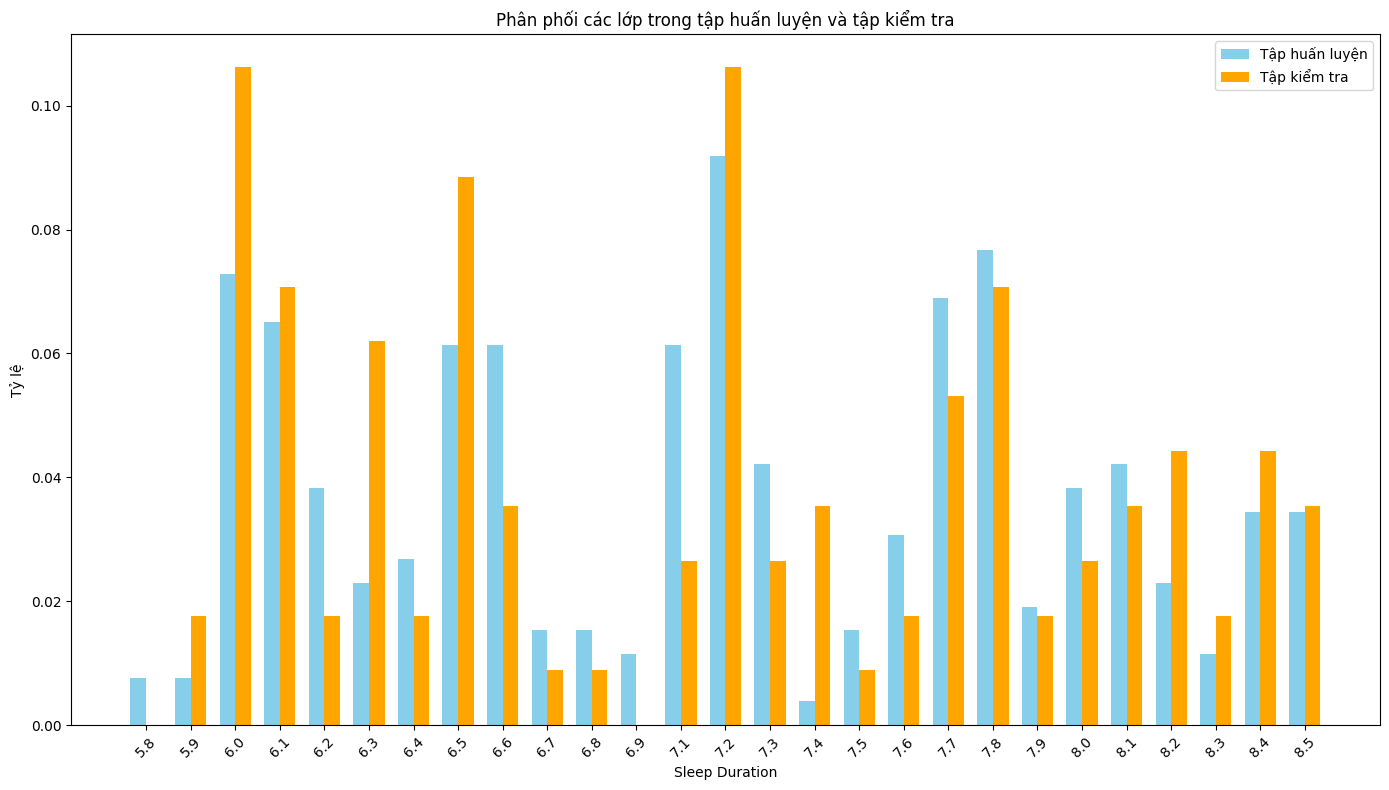

In [105]:
# Lấy phân phối tần suất từ y_train và y_test
train_dist = y_train.value_counts(normalize=True).sort_index()
test_dist = y_test.value_counts(normalize=True).sort_index()

# Đồng bộ các chỉ mục (lớp) giữa tập huấn luyện và tập kiểm tra
all_classes = sorted(set(train_dist.index).union(set(test_dist.index)))
train_dist = train_dist.reindex(all_classes, fill_value=0)
test_dist = test_dist.reindex(all_classes, fill_value=0)

# Tạo biểu đồ cột
fig, ax = plt.subplots(figsize=(14, 8))

# Dữ liệu trên biểu đồ
width = 0.35  # Độ rộng cột
x = range(len(all_classes))

# Vẽ cột cho tập huấn luyện và tập kiểm tra
ax.bar(x, train_dist.values, width, label='Tập huấn luyện', color='skyblue')
ax.bar([i + width for i in x], test_dist.values, width, label='Tập kiểm tra', color='orange')

# Cài đặt trục
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(all_classes, rotation=45)
ax.set_xlabel('Sleep Duration')
ax.set_ylabel('Tỷ lệ')
ax.set_title('Phân phối các lớp trong tập huấn luyện và tập kiểm tra')
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [106]:
# Định nghĩa các mô hình
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}


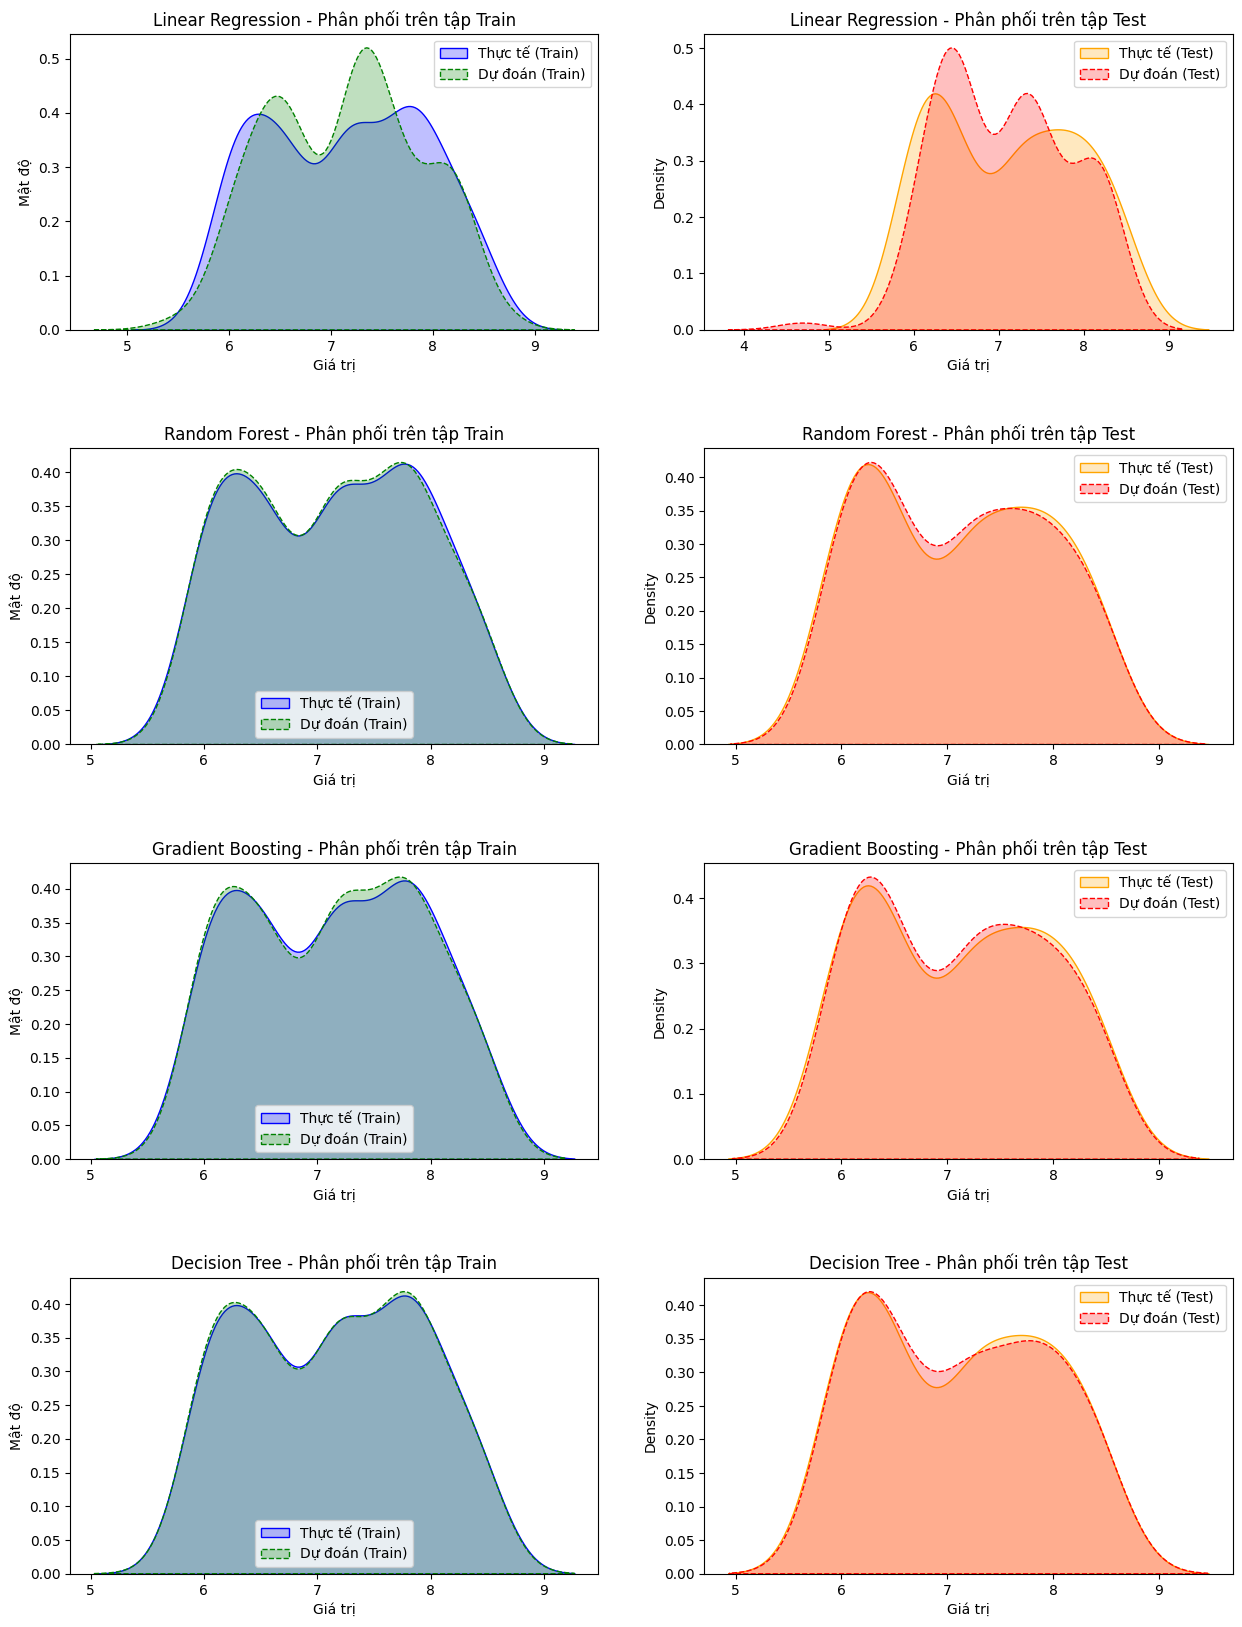


Kết quả đánh giá các mô hình:
--------------------------------------------------------------------------------

Linear Regression Performance:
Cross-validation Score (Mean Negative MSE): -0.3182
Train MSE: 0.0710, Train R²: 0.8830
Test MSE: 0.0965, Test R²: 0.8595

Random Forest Performance:
Cross-validation Score (Mean Negative MSE): -0.1353
Train MSE: 0.0038, Train R²: 0.9937
Test MSE: 0.0088, Test R²: 0.9871

Gradient Boosting Performance:
Cross-validation Score (Mean Negative MSE): -0.0902
Train MSE: 0.0040, Train R²: 0.9934
Test MSE: 0.0083, Test R²: 0.9879

Decision Tree Performance:
Cross-validation Score (Mean Negative MSE): -0.1439
Train MSE: 0.0023, Train R²: 0.9963
Test MSE: 0.0102, Test R²: 0.9852


In [107]:
# Dictionary lưu kết quả
results = {}

# Tạo figure cho tất cả biểu đồ
fig, axes = plt.subplots(len(models), 2, figsize=(15, 5*len(models)))
plt.subplots_adjust(hspace=0.4)

# Đánh giá từng mô hình
for idx, (name, model) in enumerate(models.items()):
    # Tạo và huấn luyện pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
    
    # Dự đoán
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Tính metrics
    results[name] = {
        'cv_score': cv_scores.mean(),
        'train_mse': mean_squared_error(y_train, y_train_pred),
        'test_mse': mean_squared_error(y_test, y_test_pred),
        'train_r2': r2_score(y_train, y_train_pred),
        'test_r2': r2_score(y_test, y_test_pred)
    }
    
    # Vẽ biểu đồ
    # Train set
    sns.kdeplot(y_train, label="Thực tế (Train)", color="blue", fill=True, ax=axes[idx, 0])
    sns.kdeplot(y_train_pred, label="Dự đoán (Train)", color="green", linestyle="--", fill=True, ax=axes[idx, 0])
    axes[idx, 0].set_title(f"{name} - Phân phối trên tập Train")
    axes[idx, 0].set_xlabel("Giá trị")
    axes[idx, 0].set_ylabel("Mật độ")
    axes[idx, 0].legend()
    
    # Test set
    sns.kdeplot(y_test, label="Thực tế (Test)", color="orange", fill=True, ax=axes[idx, 1])
    sns.kdeplot(y_test_pred, label="Dự đoán (Test)", color="red", linestyle="--", fill=True, ax=axes[idx, 1])
    axes[idx, 1].set_title(f"{name} - Phân phối trên tập Test")
    axes[idx, 1].set_xlabel("Giá trị")
    axes[idx, 1].legend()

plt.show()

# In kết quả đánh giá
print("\nKết quả đánh giá các mô hình:")
print("-" * 80)
for name, metrics in results.items():
    print(f"\n{name} Performance:")
    print(f"Cross-validation Score (Mean Negative MSE): {metrics['cv_score']:.4f}")
    print(f"Train MSE: {metrics['train_mse']:.4f}, Train R²: {metrics['train_r2']:.4f}")
    print(f"Test MSE: {metrics['test_mse']:.4f}, Test R²: {metrics['test_r2']:.4f}")

## 4.2. So sánh mô hình

In [108]:
# Tạo DataFrame từ dictionary kết quả
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Cross-validation Score': [metrics['cv_score'] for metrics in results.values()],
    'Train MSE': [metrics['train_mse'] for metrics in results.values()],
    'Train R²': [metrics['train_r2'] for metrics in results.values()],
    'Test MSE': [metrics['test_mse'] for metrics in results.values()],
    'Test R²': [metrics['test_r2'] for metrics in results.values()]
})

# Đặt Model làm index
comparison_df = comparison_df.set_index('Model')

# Format số thập phân
comparison_df = comparison_df.round(5)

print("Model Comparison Performance:")
pd.set_option('display.width', 120)
print(comparison_df)

Model Comparison Performance:
                   Cross-validation Score  Train MSE  Train R²  Test MSE  Test R²
Model                                                                            
Linear Regression                -0.31824    0.07105   0.88296   0.09649  0.85948
Random Forest                    -0.13531    0.00382   0.99371   0.00885  0.98712
Gradient Boosting                -0.09023    0.00403   0.99336   0.00830  0.98792
Decision Tree                    -0.14395    0.00227   0.99626   0.01016  0.98521


- Gradient Boosting có hiệu suất tổng thể tốt nhất với Test MSE thấp nhất và Test R² cao nhất.
- Random Forest cũng là lựa chọn tốt, đặc biệt nếu cần một mô hình nhanh và ổn định hơn so với Gradient Boosting.
- Linear Regression và Decision Tree không phù hợp cho bài toán này.

**=>Kết luận**: Nhóm sẽ sử dụng mô hình Gradient Boosting để phát triển cho bài toán

## 4.3. Xây dựng mô hình đa thức

In [110]:
from sklearn.preprocessing import PolynomialFeatures

# Tiền xử lý
preprocessor = ColumnTransformer(
    transformers=[
        ('poly_num', Pipeline([
            ('poly', PolynomialFeatures(degree=3, include_bias=False)),  # Đa thức bậc 3
            ('scaler', StandardScaler())
        ]), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Pipeline với GradientBoostingRegressor
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# Huấn luyện mô hình
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('poly_num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Quality of Sleep',
                                                   'Stress Level', 'Heart Rate',
                                                   'Age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sleep Disorder',
                                                   'BMI Category', 'Occupation',
                                                   'Gender'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [111]:
# Lưu giá trị R^2
train_r2_scores = []
test_r2_scores = []
degrees = [1, 2, 3, 4, 5, 6, 7]
results = []

# Duyệt qua từng bậc đa thức
for degree in degrees:
    # Tiền xử lý
    preprocessor = ColumnTransformer(
    transformers=[
        ('poly_num', Pipeline([
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)), 
            ('scaler', StandardScaler())
        ]), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

    # Pipeline với GradientBoostingRegressor
    gb_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ])

    # Huấn luyện mô hình
    gb_pipeline.fit(X_train, y_train)
    
    # Dự đoán trên tập train và test
    y_train_pred = gb_pipeline.predict(X_train)
    y_test_pred = gb_pipeline.predict(X_test)
    
    # Tính MSE và R^2
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Cross-validation MSE
    cv_mse = -cross_val_score(gb_pipeline, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    
    # Lưu kết quả
    results.append({
        'Degree': degree,
        'Train MSE': round(train_mse, 5),
        'Test MSE': round(test_mse, 5),
        'Train R²': round(train_r2, 5),
        'Test R²': round(test_r2, 5),
        'Cross-validation MSE': round(cv_mse, 5)
    })

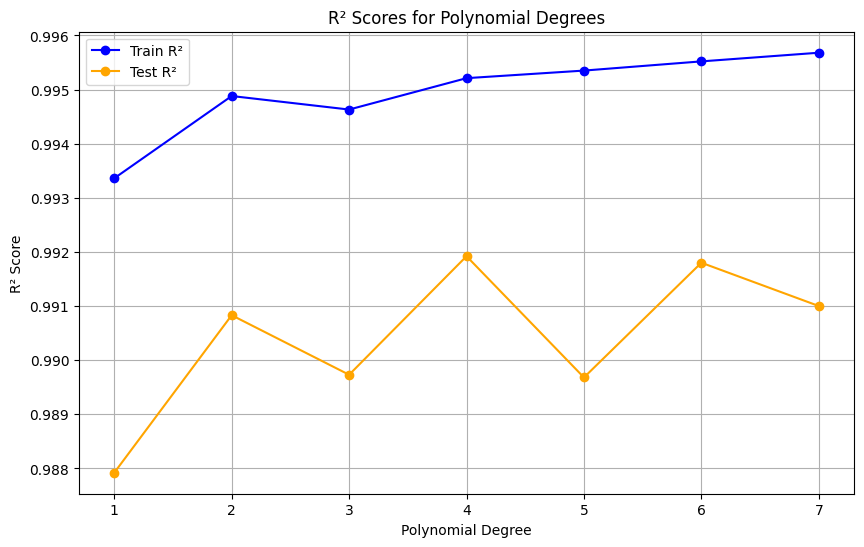

In [112]:
# Trích xuất giá trị R² từ results
train_r2_scores = [result['Train R²'] for result in results]
test_r2_scores = [result['Test R²'] for result in results]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_scores, marker='o', label='Train R²', color='blue')
plt.plot(degrees, test_r2_scores, marker='o', label='Test R²', color='orange')
plt.title('R² Scores for Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()


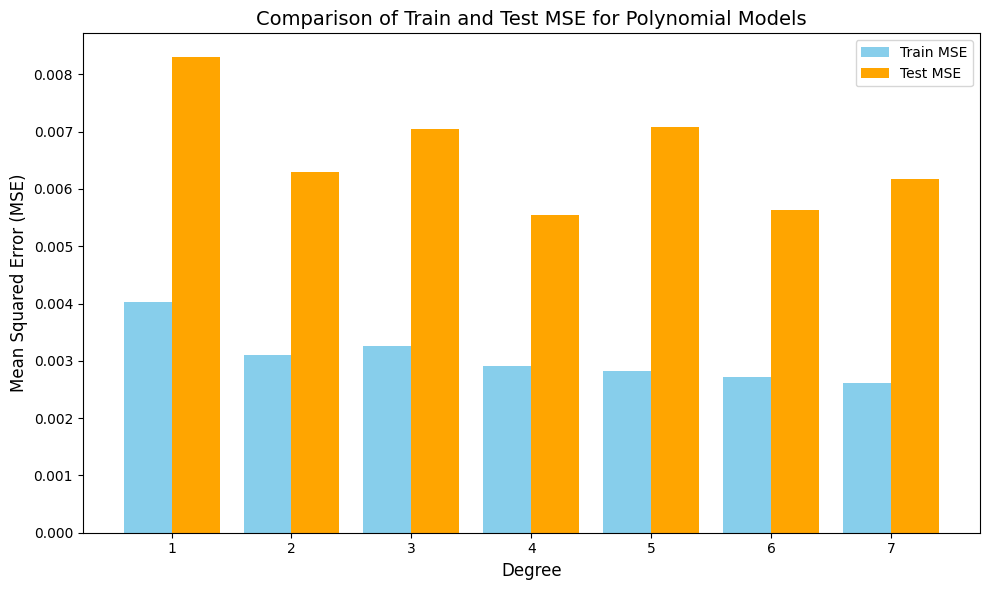

In [113]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

results_df = pd.DataFrame(results)
# Các giá trị để vẽ
x = results_df['Degree']
train_mse = results_df['Train MSE']
test_mse = results_df['Test MSE']

# Vẽ biểu đồ cột
width = 0.4  # Độ rộng của các cột
plt.bar(x - width/2, train_mse, width=width, label='Train MSE', color='skyblue')
plt.bar(x + width/2, test_mse, width=width, label='Test MSE', color='orange')

# Thêm nhãn và tiêu đề
plt.xlabel('Degree', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.title('Comparison of Train and Test MSE for Polynomial Models', fontsize=14)
plt.xticks(x)
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [114]:
# Tạo DataFrame
performance_df = pd.DataFrame(results)

# Hiển thị bảng
print(performance_df)

   Degree  Train MSE  Test MSE  Train R²  Test R²  Cross-validation MSE
0       1    0.00403   0.00830   0.99336  0.98792               0.09023
1       2    0.00311   0.00630   0.99488  0.99083               0.12094
2       3    0.00326   0.00705   0.99463  0.98973               0.11684
3       4    0.00291   0.00555   0.99521  0.99192               0.11578
4       5    0.00283   0.00708   0.99535  0.98968               0.13709
5       6    0.00272   0.00563   0.99552  0.99180               0.12427
6       7    0.00262   0.00618   0.99568  0.99100               0.10997


Bậc 1:
- Kết quả tốt nhưng không xuất sắc trên Test MSE và Test R².
- Cross-validation MSE thấp nhất, chứng tỏ tính ổn định cao, nhưng hiệu suất không tối ưu.
- Phù hợp cho trường hợp cần mô hình đơn giản và nhanh.

Bậc 2:
- Test MSE giảm so với bậc 1 (0.00630), và Test R² tăng lên (0.99083).
- Cross-validation MSE tăng đáng kể (0.12094), cho thấy tính ổn định giảm.

Bậc 3:
- Hiệu suất Test MSE và Test R² giảm nhẹ so với bậc 2.
- Cross-validation MSE vẫn cao (0.11684), mô hình có dấu hiệu overfitting nhẹ.

Bậc 4:
- Tốt nhất trên Test MSE (0.00555) và Test R² (0.99192).
- Cross-validation MSE (0.11578) nằm trong khoảng chấp nhận được, không quá cao.
- Bậc tối ưu, cân bằng tốt giữa hiệu suất dự đoán và tính ổn định.

Bậc 5:
- Hiệu suất Test MSE tăng (0.00708) và Test R² giảm (0.98968).
- Cross-validation MSE tăng đáng kể (0.13709), dấu hiệu overfitting rõ hơn.

Bậc 6 và 7:
- Train MSE tiếp tục giảm, nhưng Test MSE và Test R² không cải thiện so với bậc 4.
- Cross-validation MSE cải thiện ở bậc 7 (0.10997), nhưng vẫn không vượt qua bậc 1 hoặc 4.
- Các bậc này có xu hướng overfitting khi so sánh hiệu suất giữa tập huấn luyện và kiểm tra.

**=>Kết luận:**
Bậc tối ưu: **Bậc 4**, với hiệu suất tốt nhất trên tập kiểm tra (Test MSE = 0.00555, Test R² = 0.99192), đồng thời duy trì tính ổn định chấp nhận được qua Cross-validation MSE (0.11578).

## 4.4. Tinh chỉnh mô hình

In [115]:
# Khởi tạo lại pipeline cho bậc 4
preprocessor = ColumnTransformer(
    transformers=[
        ('poly_num', Pipeline([
            ('poly', PolynomialFeatures(degree=4, include_bias=False)),   
            ('scaler', StandardScaler())
        ]), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

four_degree_gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

### 4.4.1. Thay đổi tham số với GridSearchCV

In [116]:
# Tinh chỉnh tham số với GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(four_degree_gb_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


c:\python\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'regressor__max_depth': 20, 'regressor__max_features': 'log2', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}


### 4.4.2. Thay đổi tham số với RandomizedSearchCV

In [117]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(four_degree_gb_pipeline, random_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)


Best parameters: {'regressor__n_estimators': 300, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'log2', 'regressor__max_depth': 20}


### 4.4.3. Áp dụng tham số đã tinh chỉnh và so sánh

#### 4.4.3.1. Huấn luyện mô hình với tham số GridSearchCV

In [118]:
SearchCV_params = {
    'n_estimators': 100,
    'max_depth': 20,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 10
}

SearchCV_gb_optimized = GradientBoostingRegressor(**SearchCV_params, random_state=42)

# Huấn luyện mô hình
GS_optimized_gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SearchCV_gb_optimized)
])
GS_optimized_gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('poly_num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=4,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Quality of Sleep',
                                                   'Stress Level', 'Heart Rate',
                                                   'Age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sleep Disorder',
                                                   'BMI Category', 'Occupation',
                                                   'Gender'])])),
                ('regressor',
                 GradientBoostingRegressor(max_depth=20, max_features='log2',
                                           min_samples_split=10,
                                           random_state=42))])

#### 4.4.3.2. Huấn luyện mô hình với tham số RandomizedSearchCV

In [119]:
RandomizedSearchCV_params = {
    'n_estimators': 300,
    'max_depth': 20,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 10
}

RandomizedSearchCV_gb_optimized = GradientBoostingRegressor(**RandomizedSearchCV_params, random_state=42)

# Huấn luyện mô hình
RS_optimized_gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomizedSearchCV_gb_optimized)
])
RS_optimized_gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('poly_num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=4,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Quality of Sleep',
                                                   'Stress Level', 'Heart Rate',
                                                   'Age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sleep Disorder',
                                                   'BMI Category', 'Occupation',
                                                   'Gender'])])),
                ('regressor',
                 GradientBoostingRegressor(max_depth=20, max_features='log2',
                                           min_samples_split=10,
                                           n_estimators=300,
                                           random_state=42))])

#### 4.4.3.3. So sánh và đánh giá hiệu suất mô hình

In [120]:
# Đánh giá hiệu suất
y_train_pred = GS_optimized_gb_pipeline.predict(X_train)
y_test_pred = GS_optimized_gb_pipeline.predict(X_test)

train_r2 = round(r2_score(y_train, y_train_pred), 5)
test_r2 = round(r2_score(y_test, y_test_pred), 5)

mse_train = round(mean_squared_error(y_train, y_train_pred), 5)
mse_test = round(mean_squared_error(y_test, y_test_pred), 5)

cv_scores = cross_val_score(GS_optimized_gb_pipeline, X, y, cv=5, scoring='r2')
mean_cv_r2 = round(cv_scores.mean(), 5)

print("Tinh chỉnh với GridSearchCV:")
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train R²:", train_r2)
print("Test R²:", test_r2)
print("Mean CV R²:", mean_cv_r2)

Tinh chỉnh với GridSearchCV:
Train MSE: 0.00227
Test MSE: 0.00534
Train R²: 0.99626
Test R²: 0.99222
Mean CV R²: 0.73842


In [121]:
# Đánh giá hiệu suất
y_train_pred = RS_optimized_gb_pipeline.predict(X_train)
y_test_pred = RS_optimized_gb_pipeline.predict(X_test)

train_r2 = round(r2_score(y_train, y_train_pred), 5)
test_r2 = round(r2_score(y_test, y_test_pred), 5)

mse_train = round(mean_squared_error(y_train, y_train_pred), 5)
mse_test = round(mean_squared_error(y_test, y_test_pred), 5)

cv_scores = cross_val_score(RS_optimized_gb_pipeline, X, y, cv=5, scoring='r2')
mean_cv_r2 = round(cv_scores.mean(), 5)

print("Tinh chỉnh với RandomizedSearchCV:")
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train R²:", train_r2)
print("Test R²:", test_r2)
print("Mean CV R²:", mean_cv_r2)

Tinh chỉnh với RandomizedSearchCV:
Train MSE: 0.00227
Test MSE: 0.00538
Train R²: 0.99626
Test R²: 0.99216
Mean CV R²: 0.73838


In [122]:
# Dữ liệu trước và sau tinh chỉnh
data = {
    "Độ đo": ["Train MSE", "Test MSE", "Train R²", "Test R²", "Mean CV R²"],
    "Trước tinh chỉnh": [0.00291, 0.00555, 0.99521, 0.99192, 0.11578],
    "Tinh chỉnh với GridSearchCV": [0.00227, 0.00534, 0.99626, 0.99222, 0.73842],
    "Tinh chỉnh với RandomizedSearchCV": [0.00227, 0.00538, 0.99626, 0.99216, 0.73838]
}

comparison_df = pd.DataFrame(data)
print(comparison_df)

        Độ đo  Trước tinh chỉnh  Tinh chỉnh với GridSearchCV  Tinh chỉnh với RandomizedSearchCV
0   Train MSE           0.00291                      0.00227                            0.00227
1    Test MSE           0.00555                      0.00534                            0.00538
2    Train R²           0.99521                      0.99626                            0.99626
3     Test R²           0.99192                      0.99222                            0.99216
4  Mean CV R²           0.11578                      0.73842                            0.73838


**1.** Hiệu suất trên tập huấn luyện (Train MSE và Train R²):
- Train MSE giảm từ 0.00291 (trước tinh chỉnh) xuống còn 0.00227 (sau tinh chỉnh với cả GridSearchCV và RandomizedSearchCV). Điều này cho thấy mô hình sau tinh chỉnh khớp dữ liệu huấn luyện tốt hơn.
- Train R² tăng nhẹ từ 0.99521 lên 0.99626, cho thấy mô hình giải thích được nhiều phương sai hơn trên tập huấn luyện.

**2.** Hiệu suất trên tập kiểm tra (Test MSE và Test R²):
- Test MSE cải thiện nhẹ từ 0.00555 xuống 0.00534 với GridSearchCV và 0.00538 với RandomizedSearchCV. Mặc dù cải thiện không lớn, điều này cho thấy mô hình sau tinh chỉnh có khả năng tổng quát hóa tốt hơn.
- Test R² tăng nhẹ từ 0.99192 lên 0.99222 (GridSearchCV) và 0.99216 (RandomizedSearchCV). Điều này phản ánh mức độ giải thích dữ liệu của mô hình tốt hơn.

**3.** Hiệu suất Cross-validation (Mean CV R²):
- Mean CV R² tăng đáng kể từ 0.11578 lên 0.73842 (GridSearchCV) và 0.73838 (RandomizedSearchCV). Đây là cải thiện lớn nhất, cho thấy mô hình sau tinh chỉnh hoạt động ổn định hơn khi đánh giá bằng phương pháp Cross-validation.

**=>Kết luận:**
GridSearchCV có vẻ là lựa chọn tối ưu trong trường hợp này:

- Duy trì hiệu suất tốt trên cả tập huấn luyện và kiểm thử.
- Tăng hiệu quả cross-validation (Mean CV R² cao hơn so với trước khi tinh chỉnh và so với GridSearchCV).

**So sánh giữa GridSearchCV và RandomizedSearchCV:**
- Hiệu suất giữa hai phương pháp tinh chỉnh rất tương đồng, cả về Train MSE, Test MSE, Train R², Test R² và Mean CV R². Tuy nhiên, GridSearchCV có Test MSE và Test R² tốt hơn một chút so với RandomizedSearchCV, điều này cho thấy GridSearchCV có thể tìm được tổ hợp siêu tham số tối ưu hơn.

**Tổng kết:**
Mô hình sau tinh chỉnh hoạt động tốt hơn so với trước tinh chỉnh:

+ Giảm lỗi MSE trên cả tập huấn luyện và kiểm tra.
+ Tăng R², cho thấy khả năng giải thích dữ liệu tốt hơn.
+ Cải thiện đáng kể Mean CV R², cho thấy tính ổn định và khả năng tổng quát hóa tốt hơn.

### 4.4.4. Xử lý giá trị ngoại lệ (Outliers)

In [123]:
# Sao chép dữ liệu để tránh ảnh hưởng bản gốc
data_cleaned = X.copy()

# Xử lý Outliers cho các cột số học
for col in numeric_cols:
    Q1 = data_cleaned[col].quantile(0.25)  # Phân vị thứ 25
    Q3 = data_cleaned[col].quantile(0.75)  # Phân vị thứ 75
    IQR = Q3 - Q1  # Khoảng IQR
    
    # Ngưỡng lọc
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Loại bỏ outliers
    data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)]

# Kết quả dữ liệu đã loại bỏ outliers
print("Kích thước dữ liệu trước xử lý:", X.shape)
print("Kích thước dữ liệu sau xử lý:", data_cleaned.shape)


Kích thước dữ liệu trước xử lý: (374, 8)
Kích thước dữ liệu sau xử lý: (359, 8)


In [124]:
# Chia lại tập train và test
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    data_cleaned, 
    y.loc[data_cleaned.index], 
    test_size=0.30, 
    random_state=42
)

# Huấn luyện mô hình với dữ liệu đã xử lý outliers (tập train)
GS_optimized_gb_pipeline.fit(X_train_cleaned, y_train_cleaned)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('poly_num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=4,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Quality of Sleep',
                                                   'Stress Level', 'Heart Rate',
                                                   'Age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sleep Disorder',
                                                   'BMI Category', 'Occupation',
                                                   'Gender'])])),
                ('regressor',
                 GradientBoostingRegressor(max_depth=20, max_features='log2',
                                           min_samples_split=10,
                                           random_state=42))])

In [125]:
# Dự đoán trên tập train và test
y_train_cleaned_pred = GS_optimized_gb_pipeline.predict(X_train_cleaned)
y_test_cleaned_pred = GS_optimized_gb_pipeline.predict(X_test_cleaned)

# Tính các độ đo hiệu suất
train_r2_cleaned = round(r2_score(y_train_cleaned, y_train_cleaned_pred), 5)
test_r2_cleaned = round(r2_score(y_test_cleaned, y_test_cleaned_pred), 5)

mse_train_cleaned = round(mean_squared_error(y_train_cleaned, y_train_cleaned_pred), 5)
mse_test_cleaned = round(mean_squared_error(y_test_cleaned, y_test_cleaned_pred), 5)

# Cross-validation trên tập train đã làm sạch
cv_scores_cleaned = cross_val_score(GS_optimized_gb_pipeline, X_train_cleaned, y_train_cleaned, cv=5, scoring='r2')
mean_cv_r2_cleaned = round(cv_scores_cleaned.mean(), 5)

In [126]:
# So sánh với hiệu suất trước xử lý
data_comparison = {
    "Độ đo": ["Train MSE", "Test MSE", "Train R²", "Test R²", "Mean CV R²"],
    "Trước khi loại bỏ Outliers": [0.00227, 0.00534, 0.99626, 0.99222, 0.73842],
    "Sau khi loại bỏ Outliers": [mse_train_cleaned, mse_test_cleaned, train_r2_cleaned, test_r2_cleaned, mean_cv_r2_cleaned]
}

comparison_df = pd.DataFrame(data_comparison)

# Hiển thị bảng so sánh
print("\nSo sánh hiệu suất trước và sau khi loại bỏ outliers:")
pd.set_option('display.width', 120)
print(comparison_df)


So sánh hiệu suất trước và sau khi loại bỏ outliers:
        Độ đo  Trước khi loại bỏ Outliers  Sau khi loại bỏ Outliers
0   Train MSE                     0.00227                   0.00248
1    Test MSE                     0.00534                   0.00561
2    Train R²                     0.99626                   0.99597
3     Test R²                     0.99222                   0.99111
4  Mean CV R²                     0.73842                   0.97889


**1. Hiệu suất trên tập huấn luyện (Train MSE và Train R²):**
- Train MSE: Tăng nhẹ từ 0.00227 (trước khi loại bỏ outliers) lên 0.00248 (sau khi loại bỏ outliers). Điều này cho thấy mô hình sau khi loại bỏ outliers khớp dữ liệu huấn luyện kém hơn một chút, có thể do mất đi một phần thông tin từ dữ liệu gốc.
- Train R²: Giảm nhẹ từ 0.99626 xuống 0.99597, nhưng vẫn rất cao. Điều này cho thấy mức độ giải thích phương sai trên tập huấn luyện của mô hình giảm không đáng kể.

**2. Hiệu suất trên tập kiểm tra (Test MSE và Test R²):**
- Test MSE: Tăng nhẹ từ 0.00534 lên 0.00561, phản ánh mô hình sau khi loại bỏ outliers hoạt động trên tập kiểm tra kém hơn một chút.
- Test R²: Giảm từ 0.99222 xuống 0.99111, cho thấy khả năng giải thích dữ liệu trên tập kiểm tra bị ảnh hưởng nhẹ.

**3. Hiệu suất Cross-validation (Mean CV R²):**
- Mean CV R²: Tăng rất đáng kể từ 0.73842 lên 0.97889. Đây là cải thiện lớn nhất và là điểm nổi bật sau khi loại bỏ outliers. Điều này cho thấy mô hình tổng quát hóa tốt hơn khi đánh giá qua cross-validation, bởi việc loại bỏ outliers giúp giảm ảnh hưởng của dữ liệu nhiễu trong quá trình đánh giá mô hình.

**Kết luận:** Dựa trên kết quả trên, có thể kết luận rằng việc loại bỏ outliers trong trường hợp này không mang lại cải thiện về hiệu suất. Vì vậy nhóm chỉ dừng việc tinh chỉnh mô hình ở bước thay đổi tham số với GridSearchCV

# 5. Đánh giá mô hình

- Sử dụng phương pháp tinh chỉnh tham số GridSearchCV cho model RandomForest kết hợp với đa thức bậc 4

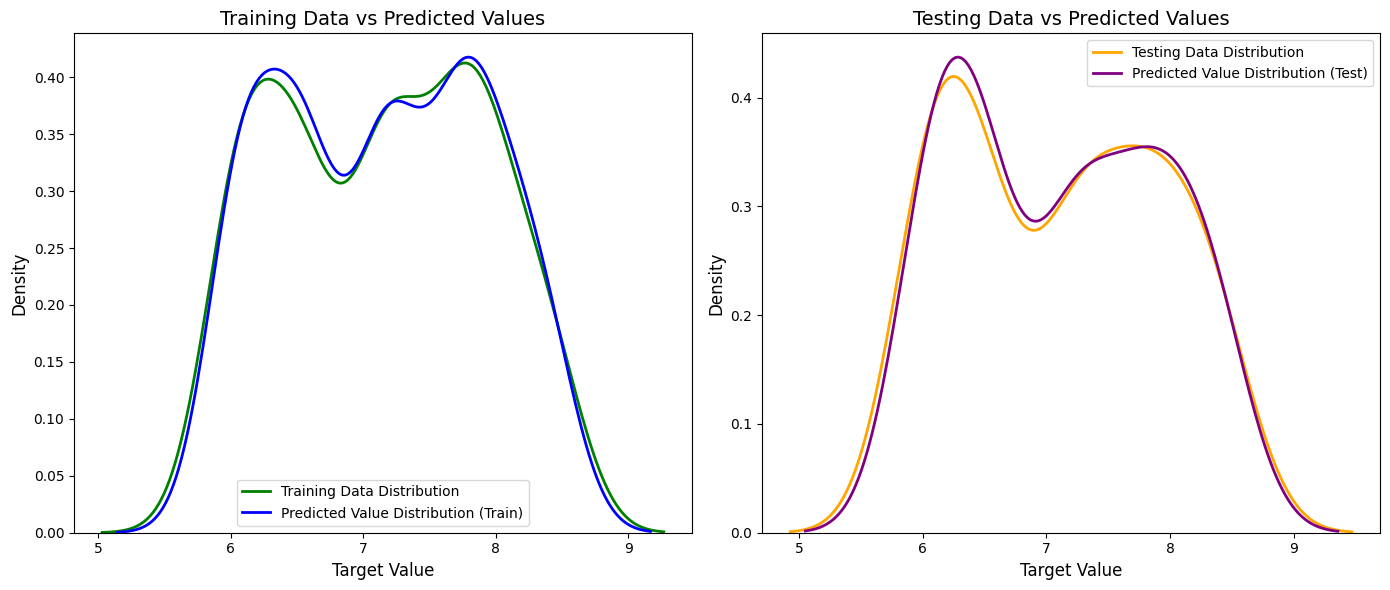

In [127]:
# Dữ liệu
y_train_actual = y_train # Giá trị thực tế của dữ liệu huấn luyện
y_train_predicted = GS_optimized_gb_pipeline.predict(X_train)  # Giá trị dự đoán từ dữ liệu huấn luyện

y_test_actual = y_test  # Giá trị thực tế của dữ liệu kiểm tra
y_test_predicted = GS_optimized_gb_pipeline.predict(X_test)  # Giá trị dự đoán từ dữ liệu kiểm tra

# Tạo figure và subplots
plt.figure(figsize=(14, 6))

# Biểu đồ 1: Training data vs Predicted values (Training)
plt.subplot(1, 2, 1)
sns.kdeplot(y_train_actual, label="Training Data Distribution", color="green", linewidth=2)
sns.kdeplot(y_train_predicted, label="Predicted Value Distribution (Train)", color="blue", linewidth=2)
plt.title("Training Data vs Predicted Values", fontsize=14)
plt.xlabel("Target Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()

# Biểu đồ 2: Testing data vs Predicted values (Testing)
plt.subplot(1, 2, 2)
sns.kdeplot(y_test_actual, label="Testing Data Distribution", color="orange", linewidth=2)
sns.kdeplot(y_test_predicted, label="Predicted Value Distribution (Test)", color="purple", linewidth=2)
plt.title("Testing Data vs Predicted Values", fontsize=14)
plt.xlabel("Target Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()

# Hiển thị
plt.tight_layout()
plt.show()


- NHẬN XÉT:

**Training**:

Phân phối của giá trị thực (đường màu xanh lá) và giá trị dự đoán (đường màu xanh dương) gần như trùng khớp. Điều này cho thấy mô hình dự đoán khá chính xác trên tập huấn luyện,đã học tốt các đặc trưng của dữ liệu.

**Testing**:

Trên tập kiểm tra, phân phối của giá trị thực (đường màu vàng) và giá trị dự đoán (đường màu tím) cũng rất sát nhau. Điều này chứng tỏ mô hình không bị overfitting và vẫn dự đoán tốt trên dữ liệu chưa từng thấy.

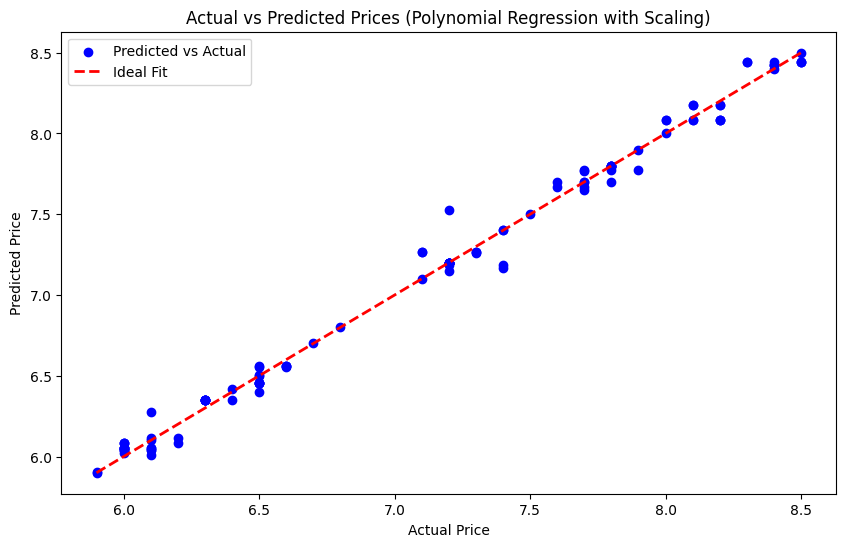

In [128]:
# Vẽ biểu đồ so sánh giá trị thực và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=1, color='blue', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label="Ideal Fit")

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Polynomial Regression with Scaling)')
plt.legend()
plt.show()

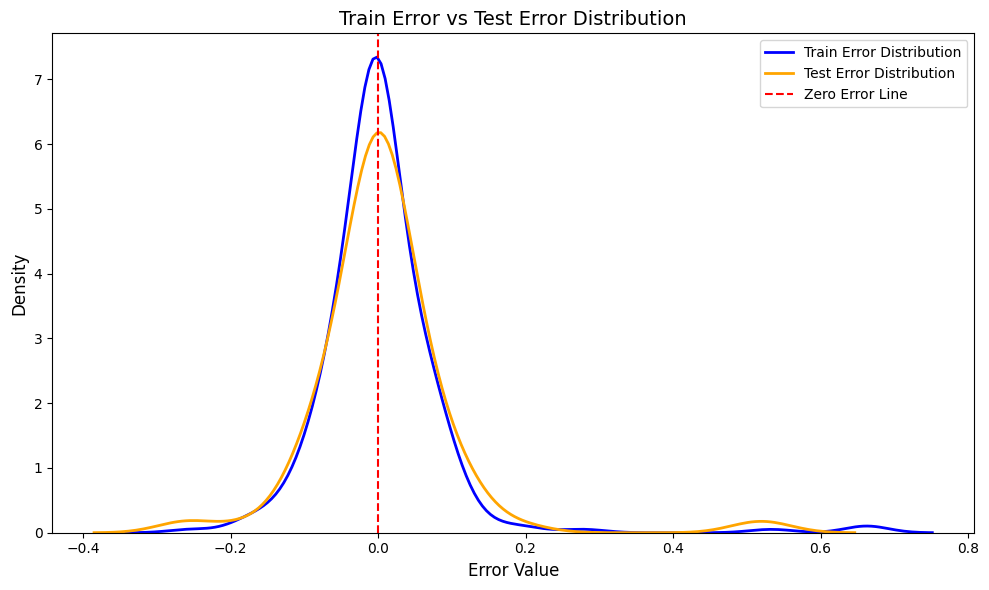

In [129]:
# Dữ liệu
y_train_actual = y_train  # Giá trị thực tế của tập huấn luyện
y_train_predicted = GS_optimized_gb_pipeline.predict(X_train)  # Giá trị dự đoán trên tập huấn luyện

y_test_actual = y_test  # Giá trị thực tế của tập kiểm tra
y_test_predicted = GS_optimized_gb_pipeline.predict(X_test)  # Giá trị dự đoán trên tập kiểm tra

# Tính toán sai số
train_errors = y_train_predicted - y_train_actual  # Sai số tập huấn luyện
test_errors = y_test_predicted - y_test_actual  # Sai số tập kiểm tra

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Phân phối sai số trên tập huấn luyện
sns.kdeplot(train_errors, label="Train Error Distribution", color="blue", linewidth=2)

# Phân phối sai số trên tập kiểm tra
sns.kdeplot(test_errors, label="Test Error Distribution", color="orange", linewidth=2)

# Đường dọc biểu thị sai số bằng 0
plt.axvline(0, color="red", linestyle="--", label="Zero Error Line")

# Thêm tiêu đề và chú thích
plt.title("Train Error vs Test Error Distribution", fontsize=14)
plt.xlabel("Error Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

- NHẬN XÉT

Sai số chủ yếu tập trung quanh giá trị 0, thể hiện rằng phần lớn các dự đoán của mô hình rất chính xác. Đỉnh của hai đường phân phối đều rất cao, chứng minh rằng số lượng dự đoán có sai số nhỏ là rất lớn.

Tuy nhiên, đường màu cam (test) có phần "đuôi" dài hơn một chút so với đường màu xanh dương (train), cho thấy có một vài điểm trong tập kiểm tra có sai số lớn hơn, nhưng không quá đáng kể.

# 6. Demo 

In [130]:
# Lấy một số hàng từ tập kiểm thử
sample_data = X_test.sample(10, random_state=42)
print("Dữ liệu mẫu:")
print(sample_data)


Dữ liệu mẫu:
     Quality of Sleep  Stress Level  Heart Rate  Age Sleep Disorder BMI Category   Occupation  Gender
66                  8             6          68   32           None       Normal   Accountant    Male
57                  6             8          72   32           None       Normal       Doctor    Male
249                 6             7          72   44           None   Overweight  Salesperson    Male
82                  7             5          70   35           None   Overweight      Teacher    Male
233                 6             7          72   44       Insomnia   Overweight  Salesperson    Male
124                 8             4          68   37           None       Normal   Accountant  Female
94                  8             4          68   36       Insomnia       Normal   Accountant  Female
229                 6             7          72   44       Insomnia   Overweight  Salesperson    Male
56                  7             6          70   32           None  

In [131]:
# Sử dụng mô hình đã huấn luyện để dự đoán
predictions = GS_optimized_gb_pipeline.predict(sample_data)

# Hiển thị kết quả dự đoán
results = pd.DataFrame({
    "Chỉ số": sample_data.index,
    "Giá trị dự đoán (Predicted)": predictions
})
print("\nKết quả dự đoán:")
print(results)



Kết quả dự đoán:
   Chỉ số  Giá trị dự đoán (Predicted)
0      66                     7.398391
1      57                     6.057175
2     249                     6.485307
3      82                     6.700027
4     233                     6.326492
5     124                     7.200535
6      94                     7.195302
7     229                     6.326492
8      56                     7.666657
9      39                     7.699984


In [132]:
# Giá trị thực tế
actual_values = y_test.loc[sample_data.index]

# So sánh giá trị thực tế và dự đoán
comparison = pd.DataFrame({
    "Giá trị thực tế": actual_values,
    "Giá trị dự đoán": predictions
})
print("\nSo sánh giá trị thực tế và dự đoán:")
print(comparison)



So sánh giá trị thực tế và dự đoán:
     Giá trị thực tế  Giá trị dự đoán
66               7.2         7.398391
57               6.0         6.057175
249              6.5         6.485307
82               6.7         6.700027
233              6.3         6.326492
124              7.2         7.200535
94               7.2         7.195302
229              6.3         6.326492
56               7.7         7.666657
39               7.6         7.699984


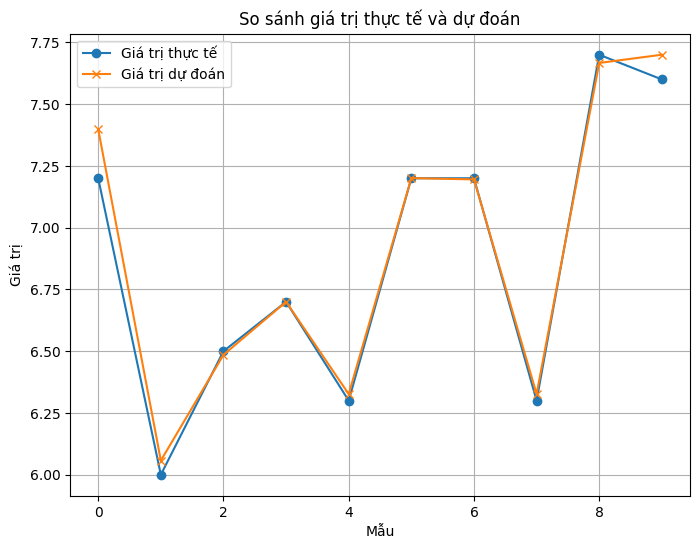

In [133]:
# Biểu đồ so sánh
plt.figure(figsize=(8, 6))
plt.plot(actual_values.values, label="Giá trị thực tế", marker='o')
plt.plot(predictions, label="Giá trị dự đoán", marker='x')
plt.title("So sánh giá trị thực tế và dự đoán")
plt.xlabel("Mẫu")
plt.ylabel("Giá trị")
plt.legend()
plt.grid()
plt.show()


# 7. Tổng kết

**Phân phối giá trị thực và giá trị dự đoán:** gần như trùng khớp trên cả tập train và tập test, mô hình dự đoán chính xác.

**1. Ưu:**

- Sai số: Phân phối sai số tập trung quanh giá trị 0, cho thấy sai số nhỏ và ít thiên lệch

- Tổng quát hóa: mô hình hoạt động tốt trên cả tập train và tập test.

**2. Nhược:**
- Sai số nhỏ nhưng vẫn tồn tại: mặc dù sai số tập trung quanh giá trị 0, vẫn có những giá trị lệch lớn hơn 0.2, có thể gây ảnh hưởng trong các bài toán đòi độ chính xác cực cao

- Mô hình không xử lý tốt các trường hợp ngoại lai hay bất thường.